In [1]:

!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-23.2.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Program Files\Python310\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importing the necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import plot_tree
import folium
import itertools
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [7]:
con = sqlite3.connect("accident_data_v1.0.0_2023.db")
cur = con.cursor()

### To retrieve the Tables in the database

In [8]:
Tables = []
cur.execute("SELECT name from sqlite_master WHERE type='table'")
for i in cur.fetchall():
    Tables.append(str(i[0]))  # Appends the table name (index 0 in the tuple) to the list
    
Tables

['accident', 'casualty', 'vehicle', 'lsoa']

### To see the attributes and identification of the primary and foreign keys

In [9]:
Attribute_Info = cur.execute(f"PRAGMA table_info(accident)")
accident_Columns = Attribute_Info.fetchall()
accident_Columns

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [10]:
Attribute_Info = cur.execute(f"PRAGMA table_info(casualty)")
casualty_Columns = Attribute_Info.fetchall()
casualty_Columns

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [11]:
Attribute_Info = cur.execute(f"PRAGMA table_info(vehicle)")
vehicle_Columns = Attribute_Info.fetchall()
vehicle_Columns

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [12]:
# For the check attributes lsoa column 
Attribute_Info = cur.execute(f"PRAGMA table_info(lsoa)")
lsoa_Columns = Attribute_Info.fetchall()
lsoa_Columns

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

### Rerunning the commands for finding the column names and saving the results in a variable. Using a loop or a list comprehension, convert these variables into a separate list of column names for each table.

In [13]:
# For the Accident_Table
List_accident_Columns = [] # Creates an empty list to store the column names
cur.execute("PRAGMA table_info(accident)") # Executes the query to get column information
for i in cur.fetchall(): # Loops through the rows returned by the query
    List_accident_Columns.append(i[1])
    
List_accident_Columns

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [14]:
# For the Casualty_Table
List_casualty_Columns = [] # Creates an empty list to store the column names
cur.execute("PRAGMA table_info(casualty)") # Executes the query to get column information
for i in cur.fetchall(): # Loops through the rows returned by the query
    List_casualty_Columns.append(i[1])
    
List_casualty_Columns

['casualty_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile']

In [15]:
# For the Vehicle_Table
List_vehicle_Columns = [] # Creates an empty list to store the column names
cur.execute("PRAGMA table_info(vehicle)") # Executes the query to get column information
for i in cur.fetchall(): # Loops through the rows returned by the query
    List_vehicle_Columns.append(i[1])
    
List_vehicle_Columns

['vehicle_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type']

In [16]:
# For the Lsoa_Table
List_lsoa_Columns = [] # Creates an empty list to store the column names
cur.execute("PRAGMA table_info(lsoa)") # Executes the query to get column information
for i in cur.fetchall(): # Loops through the rows returned by the query
    List_lsoa_Columns.append(i[1])
    
List_lsoa_Columns

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

### Using COUNT find the length of each of the Table(accident, vehicle and casualty tables) in the Database for the year 2020  

In [17]:
# length of the Accident_Table for year 2020
res = cur.execute("""
    SELECT COUNT(*) 
    FROM accident 
    WHERE accident_year = 2020
""")
Accid_Count= res.fetchall()[0][0]

print(f"The length of the accident table for the year 2020 is: {Accid_Count}")

The length of the accident table for the year 2020 is: 91199


In [18]:
# length of the Vehicle_Table for year 2020
res = cur.execute("""
    SELECT COUNT(*) 
    FROM vehicle 
    WHERE accident_year = 2020
""")
Vehi_Count = res.fetchall()[0][0]

print(f"The length of the Vehicle table for year 2020 is: {Vehi_Count}")

The length of the Vehicle table for year 2020 is: 167375


In [19]:
# length of the Casualty_Table for year 2020
res = cur.execute("""
    SELECT COUNT(*) 
    FROM casualty 
    WHERE accident_year = 2020""")
Cas_Count = res.fetchall()[0][0]

print(f"The length of the Casualty table for year 2020 is: {Cas_Count}")

The length of the Casualty table for year 2020 is: 115584


In [20]:
# length of the Lsoa_Table for year 2020
res = cur.execute("""
    SELECT COUNT(*) 
    FROM lsoa 
""")
Lsoa_Count= res.fetchall()[0][0]

print(f"The length of the lsoa table for the year 2020 is: {Lsoa_Count}")

The length of the lsoa table for the year 2020 is: 34378


### Execute an SQL command on the database (using your cursor object) that returns all the columns and all of the rows corresponding to the accident_year 2020, for the accident, vehicle and casualty tables.

In [21]:
output= """

SELECT *
FROM accident

WHERE accident_year = 2020

"""

cur.execute(output)
accident_data_2020 = cur.fetchall()

accident_data_2020

[('2020010219808',
  2020,
  '010219808',
  521389.0,
  175144.0,
  -0.254001,
  51.462262,
  1,
  3,
  1,
  1,
  '04/02/2020',
  3,
  '09:00',
  10,
  'E09000032',
  'E09000032',
  6,
  0,
  6,
  20,
  0,
  -1,
  0,
  -1,
  9,
  9,
  1,
  9,
  9,
  0,
  0,
  1,
  3,
  2,
  'E01004576'),
 ('2020010220496',
  2020,
  '010220496',
  529337.0,
  176237.0,
  -0.139253,
  51.470327,
  1,
  3,
  1,
  2,
  '27/04/2020',
  2,
  '13:55',
  9,
  'E09000022',
  'E09000022',
  3,
  3036,
  6,
  20,
  9,
  2,
  6,
  0,
  0,
  4,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  2,
  'E01003034'),
 ('2020010228005',
  2020,
  '010228005',
  526432.0,
  182761.0,
  -0.178719,
  51.529614,
  1,
  3,
  1,
  1,
  '01/01/2020',
  4,
  '01:25',
  1,
  'E09000033',
  'E09000033',
  5,
  0,
  6,
  30,
  3,
  1,
  6,
  0,
  0,
  0,
  4,
  1,
  2,
  0,
  0,
  1,
  1,
  2,
  'E01004726'),
 ('2020010228006',
  2020,
  '010228006',
  538676.0,
  184371.0,
  -0.001683,
  51.54121,
  1,
  2,
  1,
  1,
  '01/01/2020',
  4,
  '0

In [22]:
output= """

SELECT *
FROM casualty

WHERE accident_year = 2020

"""

cur.execute(output)
casualty_data_2020 = cur.fetchall()

casualty_data_2020

[(484748,
  '2020010219808',
  2020,
  '010219808',
  1,
  1,
  3,
  1,
  31,
  6,
  3,
  9,
  5,
  0,
  0,
  0,
  0,
  1,
  4),
 (484749,
  '2020010220496',
  2020,
  '010220496',
  1,
  1,
  3,
  2,
  2,
  1,
  3,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  2),
 (484750,
  '2020010220496',
  2020,
  '010220496',
  1,
  2,
  3,
  2,
  4,
  1,
  3,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  2),
 (484751,
  '2020010228005',
  2020,
  '010228005',
  1,
  1,
  3,
  1,
  23,
  5,
  3,
  5,
  9,
  0,
  0,
  0,
  0,
  1,
  3),
 (484752,
  '2020010228006',
  2020,
  '010228006',
  1,
  1,
  3,
  1,
  47,
  8,
  2,
  4,
  1,
  0,
  0,
  0,
  0,
  1,
  3),
 (484753,
  '2020010228011',
  2020,
  '010228011',
  1,
  1,
  3,
  2,
  32,
  6,
  3,
  6,
  9,
  0,
  0,
  0,
  0,
  1,
  8),
 (484754,
  '2020010228011',
  2020,
  '010228011',
  1,
  2,
  3,
  2,
  33,
  6,
  3,
  6,
  9,
  0,
  0,
  0,
  0,
  -1,
  -1),
 (484755,
  '2020010228012',
  2020,
  '010228012',
  1,
  1,
  1,
  1,
  25,
  5,
  3,
  0,
  0,

In [23]:
output= """

SELECT *
FROM vehicle

WHERE accident_year = 2020

"""

cur.execute(output)
vehicle_data_2020 = cur.fetchall()

vehicle_data_2020

[(681716,
  '2020010219808',
  2020,
  '010219808',
  1,
  9,
  9,
  5,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  9,
  6,
  2,
  32,
  6,
  1968,
  2,
  6,
  'AUDI Q5',
  4,
  1),
 (681717,
  '2020010220496',
  2020,
  '010220496',
  1,
  9,
  0,
  4,
  2,
  6,
  0,
  2,
  0,
  0,
  0,
  0,
  1,
  1,
  2,
  1,
  45,
  7,
  1395,
  1,
  2,
  'AUDI A1',
  7,
  1),
 (681718,
  '2020010228005',
  2020,
  '010228005',
  1,
  9,
  0,
  18,
  -1,
  -1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  6,
  3,
  -1,
  -1,
  -1,
  -1,
  -1,
  '-1',
  -1,
  -1),
 (681719,
  '2020010228006',
  2020,
  '010228006',
  1,
  8,
  0,
  18,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  44,
  7,
  1798,
  8,
  8,
  'TOYOTA PRIUS',
  2,
  1),
 (681720,
  '2020010228011',
  2020,
  '010228011',
  1,
  9,
  0,
  18,
  3,
  7,
  9,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  6,
  1,
  20,
  4,
  2993,
  2,
  4,
  'BMW 4 SERIES',
  -1,
  -1),
 (681721,
  '2020010228012',
  2020,
  '010228012',
  1,
  9

In [24]:
output= """

SELECT *
FROM lsoa

"""

cur.execute(output)
lsoa_data_2020 = cur.fetchall()

lsoa_data_2020

[(1,
  'E01000001',
  'City of London 001A',
  'City of London 001A',
  129865.232551575,
  2635.77200095126,
  '68cc6127-1008-4fbe-a16c-78fb089a7c43'),
 (2,
  'E01000002',
  'City of London 001B',
  'City of London 001B',
  228418.896621704,
  2707.98620166511,
  '937edbc3-c1bf-4d35-b274-b0a1480a7c09'),
 (3,
  'E01000003',
  'City of London 001C',
  'City of London 001C',
  59054.7690048218,
  1224.77447915666,
  '2686dcaf-10b9-4736-92af-4788d4feaa69'),
 (4,
  'E01000004',
  'City of London 001D',
  'City of London 001D',
  2544551.14173126,
  10718.4662400471,
  '3c493140-0b3f-4b9a-b358-22011dc5fb89'),
 (5,
  'E01000005',
  'City of London 001E',
  'City of London 001E',
  189578.164024353,
  2275.8093576013,
  'b569093d-788d-41be-816c-d6d7658b2311'),
 (6,
  'E01000006',
  'Barking and Dagenham 016A',
  'Barking and Dagenham 016A',
  146536.3332901,
  1966.13897042181,
  '0c8f097b-5cb2-4a07-a821-64159adecf58'),
 (7,
  'E01000007',
  'Barking and Dagenham 015A',
  'Barking and Dagenha

### Using Pandas DataFrames to store the accident, vehicle, and casualty tables

In [25]:
# To view more columns and rows in the dataset. 
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

In [26]:
#For Accident dataframe
Accident_df = pd.DataFrame(accident_data_2020, columns=List_accident_Columns)
Accident_df

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties  \
0                      3                   1                     1   
1                      3                   1                     2   
2                      3                   1                     1   
3                      2                   1                     1   
4                      3                   1                     2   
...                  ...                 ...                   ...   
91194                  2                   2                     1   
91195                  3                   1                     1   
91196                  2                   2                     1   
91197                  3                   2                     1   
91198                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
0      04/02/2020            3  09:00                        10   
1      27/04/2020            2  13:55                         9   
2      01/01/2020            4  01:25                         1   
3      01/01/2020            4  01:50                        17   
4      01/01/2020            4  02:25                         1   
...           ...          ...    ...                       ...   
91194  12/08/2020            4  14:30                       918   
91195  13/11/2020            6  15:05                       922   
91196  15/04/2020            4  12:42                       910   
91197  15/12/2020            3  14:00                       932   
91198  25/08/2020            3  13:50                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
0                        E09000032               E09000032                 6   
1                        E09000022               E09000022                 3   
2                        E09000033               E09000033                 5   
3                        E09000025               E09000025                 3   
4                        E09000033               E09000033                 3   
...                            ...                     ...               ...  

In [27]:
#For Vehicle dataframe
Vehicle_df = pd.DataFrame(vehicle_data_2020, columns=List_vehicle_Columns)
Vehicle_df.head() # To see the first five rows

vehicle_index accident_index  accident_year accident_reference  \
0         681716  2020010219808           2020          010219808   
1         681717  2020010220496           2020          010220496   
2         681718  2020010228005           2020          010228005   
3         681719  2020010228006           2020          010228006   
4         681720  2020010228011           2020          010228011   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             9                        9   
1                  1             9                        0   
2                  1             9                        0   
3                  1             8                        0   
4                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
0                  5                       1                     5   
1                  4                       2                     6   
2                 18                      -1                    -1   
3                 18                       1                     5   
4                 18                       3                     7   

   vehicle_location_restricted_lane  junction_location  \
0                                 0                  0   
1                                 0                  2   
2                                 0                  0   
3                                 0                  0   
4                                 9                  1   

   skidding_and_overturning  hit_object_in_carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   first_point_of_impact  vehicle_left_hand_drive  journey_purpose_of_driver  \
0                      4                        9                          6   
1                      1                        1                          2   
2                      1                        1                          6   
3                      1                        1                          1   
4                      1                        1                          6   

   sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
0              2             32                   6                1968   
1              1             45                   7                1395   
2              3             -1                  -1                  -1   
3              1             44                   7                1798   
4              1             20                   4                2993   

   propulsion_code  age_of_vehicle generic_make_model  driver_imd_decile  \
0                2               6            AUDI Q5                  4   
1                1               2            AUDI A1                  7   
2               -1              -1                 -1                 -1   
3                8               8       TOYOTA PRIUS                  2   
4                2               4       BMW 4 SERIES                 -1   

   driver_home_area_type  
0                      1  
1                      1  
2                     -1  
3                      1  
4                     -1

In [28]:
#For Casualty dataframe
Casualty_df = pd.DataFrame(casualty_data_2020, columns=List_casualty_Columns)
Casualty_df  #To see the first five and last rows

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [29]:
#For Lsoa dataframe
Lsoa_df = pd.DataFrame(lsoa_data_2020, columns=List_lsoa_Columns)
Lsoa_df #To see the first five and last rows

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

### Data cleaning and EDA

#### To check the informations about the Accident table

In [30]:
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

#### From the above, it can be seen that both the date and time column were casted as an object. we need to change it to its appropriate dtype format.

In [31]:
# Convert the 'date' column to datetime dtype
Accident_df['date'] = pd.to_datetime(Accident_df['date'])
# Convert the 'time' column to datetime dtype
Accident_df['time'] = pd.to_datetime(Accident_df['time']).dt.time

C:\Users\760676\AppData\Local\Temp\ipykernel_11696\1330607466.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Accident_df['date'] = pd.to_datetime(Accident_df['date'])


In [32]:
# Create the 'Time' column by combining 'date' and 'time'
Accident_df['Time'] = Accident_df['date'] + pd.to_timedelta(Accident_df['time'].apply(lambda x: x.strftime('%H:%M:%S')))

In [33]:
Accident_df

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties       date  \
0                      3                   1                     1 2020-04-02   
1                      3                   1                     2 2020-04-27   
2                      3                   1                     1 2020-01-01   
3                      2                   1                     1 2020-01-01   
4                      3                   1                     2 2020-01-01   
...                  ...                 ...                   ...        ...   
91194                  2                   2                     1 2020-12-08   
91195                  3                   1                     1 2020-11-13   
91196                  2                   2                     1 2020-04-15   
91197                  3                   2                     1 2020-12-15   
91198                  3                   1                     1 2020-08-25   

       day_of_week      time  local_authority_district  \
0                3  09:00:00                        10   
1                2  13:55:00                         9   
2                4  01:25:00                         1   
3                4  01:50:00                        17   
4                4  02:25:00                         1   
...            ...       ...                       ...   
91194            4  14:30:00                       918   
91195            6  15:05:00                       922   
91196            4  12:42:00                       910   
91197            3  14:00:00                       932   
91198            3  13:50:00                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
0                        E09000032               E09000032                 6   
1                        E09000022               E09000022                 3   
2                        E09000033               E09000033                 5   
3                        E09000025               E09000025                 3   
4                        E09000033               E09000033                 3   
...                            ...                    

In [34]:
# To reorder the columns to display 'Time' directly after 'date'
cols = list(Accident_df.columns)
cols.remove('Time')
cols.insert(cols.index('time') + 1, 'Time')
Accident_df = Accident_df[cols]

In [35]:
Accident_df 

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties       date  \
0                      3                   1                     1 2020-04-02   
1                      3                   1                     2 2020-04-27   
2                      3                   1                     1 2020-01-01   
3                      2                   1                     1 2020-01-01   
4                      3                   1                     2 2020-01-01   
...                  ...                 ...                   ...        ...   
91194                  2                   2                     1 2020-12-08   
91195                  3                   1                     1 2020-11-13   
91196                  2                   2                     1 2020-04-15   
91197                  3                   2                     1 2020-12-15   
91198                  3                   1                     1 2020-08-25   

       day_of_week      time                Time  local_authority_district  \
0                3  09:00:00 2020-04-02 09:00:00                        10   
1                2  13:55:00 2020-04-27 13:55:00                         9   
2                4  01:25:00 2020-01-01 01:25:00                         1   
3                4  01:50:00 2020-01-01 01:50:00                        17   
4                4  02:25:00 2020-01-01 02:25:00                         1   
...            ...       ...                 ...                       ...   
91194            4  14:30:00 2020-12-08 14:30:00                       918   
91195            6  15:05:00 2020-11-13 15:05:00                       922   
91196            4  12:42:00 2020-04-15 12:42:00                       910   
91197            3  14:00:00 2020-12-15 14:00:00                       932   
91198            3  13:50:00 2020-08-25 13:50:00                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
0                        E09000032               E09000032                 6   
1                        E09000022               E09000022                 3   
2                        E09000033               E0900

In [36]:
# To check
Accident_df

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties       date  \
0                      3                   1                     1 2020-04-02   
1                      3                   1                     2 2020-04-27   
2                      3                   1                     1 2020-01-01   
3                      2                   1                     1 2020-01-01   
4                      3                   1                     2 2020-01-01   
...                  ...                 ...                   ...        ...   
91194                  2                   2                     1 2020-12-08   
91195                  3                   1                     1 2020-11-13   
91196                  2                   2                     1 2020-04-15   
91197                  3                   2                     1 2020-12-15   
91198                  3                   1                     1 2020-08-25   

       day_of_week      time                Time  local_authority_district  \
0                3  09:00:00 2020-04-02 09:00:00                        10   
1                2  13:55:00 2020-04-27 13:55:00                         9   
2                4  01:25:00 2020-01-01 01:25:00                         1   
3                4  01:50:00 2020-01-01 01:50:00                        17   
4                4  02:25:00 2020-01-01 02:25:00                         1   
...            ...       ...                 ...                       ...   
91194            4  14:30:00 2020-12-08 14:30:00                       918   
91195            6  15:05:00 2020-11-13 15:05:00                       922   
91196            4  12:42:00 2020-04-15 12:42:00                       910   
91197            3  14:00:00 2020-12-15 14:00:00                       932   
91198            3  13:50:00 2020-08-25 13:50:00                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
0                        E09000032               E09000032                 6   
1                        E09000022               E09000022                 3   
2                        E09000033               E0900

In [37]:
# To check
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91199 non-null  object        
 1   accident_year                                91199 non-null  int64         
 2   accident_reference                           91199 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91199 non-null  int64         
 8   accident_severity                            91199 non-null  int64         


From the above, we can see that the datatype for date and time has now been casted to its appropriate datatype. Also, we need to now drop the "time column" as we do not have a need for it.

In [38]:
# To drop the column in place (modifies the original DataFrame)
Accident_df.drop('time', axis=1, inplace=True)

# To drop the column in place (modifies the original DataFrame)
Accident_df.drop('date', axis=1, inplace=True)

C:\Users\760676\AppData\Local\Temp\ipykernel_11696\3465702644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_df.drop('time', axis=1, inplace=True)
C:\Users\760676\AppData\Local\Temp\ipykernel_11696\3465702644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_df.drop('date', axis=1, inplace=True)


In [39]:
# Create function to convert columns with object datatypes in the dataframes to string.      
def change_string(dataframe, col):
    dataframe[col] = dataframe[col].apply(str)

In [40]:
#Convert columns with object datatypes to string.
change_string(Accident_df, 'accident_index')
change_string(Vehicle_df, 'accident_index')
change_string(Casualty_df, 'accident_index')

C:\Users\760676\AppData\Local\Temp\ipykernel_11696\2018234086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col] = dataframe[col].apply(str)


#### To check the informations about the Vehicle table

In [41]:
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

#### To check the informations about the Casualty table

In [42]:
Casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

It is worthy of note that the three dataframes 
- Accident_df
- Vehicle_df and
- Casualty_df
are linked by the **accident_index** while the
- Vehicle_df and
- Casualty_df
are linked by the **vehicle_reference**


In [43]:
# To check for Nan Values in the Accident column
Accident_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
day_of_week                                     0
Time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0
speed_limit                                     0


From the above, we can see that there are some( 14 missing data in each column) missing data in the location_easting_osgr, location_northing_osgr, longitude, and latitude columns respectively 

In [44]:
# To check for Nan Values in the Vehicle column
Vehicle_df.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [45]:
# To check for Nan Values in the Casualty column
Casualty_df.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

#### To view the null values

In [46]:
nan_values_in_longitude =Accident_df[Accident_df['longitude'].isnull()]
nan_values_in_longitude

accident_index  accident_year accident_reference  location_easting_osgr  \
25520  2020052002442           2020          052002442                    NaN   
29452  2020070769852           2020          070769852                    NaN   
32689  2020122001194           2020          122001194                    NaN   
33578  2020137330369           2020          137330369                    NaN   
81252  2020522005114           2020          522005114                    NaN   
86437  2020622001016           2020          622001016                    NaN   
86642  202063A017520           2020          63A017520                    NaN   
86651  202063A018920           2020          63A018920                    NaN   
86668  202063A025020           2020          63A025020                    NaN   
86705  202063A035620           2020          63A035620                    NaN   
86785  202063A059120           2020          63A059120                    NaN   
87018  202063C020320           2020          63C020320                    NaN   
87030  202063C024520           2020          63C024520                    NaN   
87296  202063D061520           2020          63D061520                    NaN   

       location_northing_osgr  longitude  latitude  police_force  \
25520                     NaN        NaN       NaN             5   
29452                     NaN        NaN       NaN             7   
32689                     NaN        NaN       NaN            12   
33578                     NaN        NaN       NaN            13   
81252                     NaN        NaN       NaN            52   
86437                     NaN        NaN       NaN            62   
86642                     NaN        NaN       NaN            63   
86651                     NaN        NaN       NaN            63   
86668                     NaN        NaN       NaN            63   
86705                     NaN        NaN       NaN            63   
86785                     NaN        NaN       NaN            63   
87018                     NaN        NaN       NaN            63   
87030                     NaN        NaN       NaN            63   
87296                     NaN        NaN       NaN            63   

       accident_severity  number_of_vehicles  number_of_casualties  \
25520                  2                   2                     1   
29452                  3                   2                     1   
32689                  3                   2                     2   
33578                  3                   2                     1   
81252                  3                   3                     2   
86437                  3                   2                     1   
86642                  3                   2                     1   
86651                  3                   2                     1   
86668                  3                   2                     1   
86705                  3                   1                     1   
86785                  3                   2                     1   
87018                  3                   2                     2   
87030                  2                   2                     1   
87296                  3                   1                     1   

       day_of_week                Time  local_authority_district  \
25520            5 2020-11-26 16:00:00                        92   
29452            7 2020-12-19 11:10:00                       130   
32689            4 2020-09-30 18:10:00                       181   
33578            3 2020-03-03 09:16:00                       206   
81252            6 2020-05-29 19:00:00                       605   
86437            6 2020-11-13 20:16:00                        -1   
86642            4 2020-02-26 08:15:00                        -1   
86651            5 2020-02-27 05:55:00                       751   
86668            4 2020-12-02 08:15:00                        -1   
86705            4 2020-10-06 18:35:00

In [47]:
# Find rows with NaN values in any column and get their row numbers
Nan_rows = Accident_df.index[Accident_df.isnull().any(axis=1)].to_list()

print(Nan_rows)

[25520, 29452, 32689, 33578, 81252, 86437, 86642, 86651, 86668, 86705, 86785, 87018, 87030, 87296]


From the above, 
- we can see that the NaN values occurring in the four columns(location_easting_osgr, location_northing_osgr, longitude and latitude) in the accident table are on the same spot that is(same rows in their different columns). 
- After a thorough observation, "the local_authority_district" was the only feasible value for determining the latitude and longitude. This will be achieved by grouping the latitude and longitude with the same/ common **local_authority_district** and finding the mean. The NaN values will then be replaced with the mean of the various latitudes and longitudes with a common local_authority_district.
- The same process will be carried out for the location_easting_osgr and location_northing_osgr columns too since they are  bound by the same local_authority_district.

#### To fix the Null values in Longitude and Latitude

In [48]:
# Calculate mean for each 'Local_Authority_(District)'
mean_longitude =Accident_df.groupby('local_authority_district')['longitude'].transform('mean')
mean_latitude =Accident_df.groupby('local_authority_district')['latitude'].transform('mean')

# Fill missing values in 'Longitude' and 'Latitude' with the respective means
Accident_df['longitude'].fillna(mean_longitude, inplace=True)
Accident_df['latitude'].fillna(mean_latitude, inplace=True)

C:\Users\760676\AppData\Local\Temp\ipykernel_11696\4059383229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_df['longitude'].fillna(mean_longitude, inplace=True)
C:\Users\760676\AppData\Local\Temp\ipykernel_11696\4059383229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_df['latitude'].fillna(mean_latitude, inplace=True)


#### To fix the Null values in Location_easting_osgr	Location_northing_osgr

In [49]:
# Calculate mean for each 'Local_Authority_(District)'
mean_Location_easting_osgr =Accident_df.groupby('local_authority_district')['location_easting_osgr'].transform('mean')
mean_Location_northing_osgr =Accident_df.groupby('local_authority_district')['location_northing_osgr'].transform('mean')

# Fill missing values in 'Location_easting_osgr' and 'Location_northing_osgr' with the respective means
Accident_df['location_easting_osgr'].fillna(mean_longitude, inplace=True)
Accident_df['location_northing_osgr'].fillna(mean_latitude, inplace=True)

C:\Users\760676\AppData\Local\Temp\ipykernel_11696\2959587561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_df['location_easting_osgr'].fillna(mean_longitude, inplace=True)
C:\Users\760676\AppData\Local\Temp\ipykernel_11696\2959587561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accident_df['location_northing_osgr'].fillna(mean_latitude, inplace=True)


In [50]:
# To check if the Nan values have been relaced
Accident_df.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
Time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail     

In [51]:
# To doubly check with the previous rows containing Nan values
Nan_rows = Accident_df.index[Accident_df.isnull().any(axis=1)].to_list()

print(Nan_rows)

[]


### Are there significant hours of the day, and days of the week, on which accidents occur?

In [52]:
# To extract significant hours of the day that accidents occur
time = pd.DatetimeIndex(Accident_df['Time'])
hour = time.hour
mins = time.minute/60
time = hour + mins

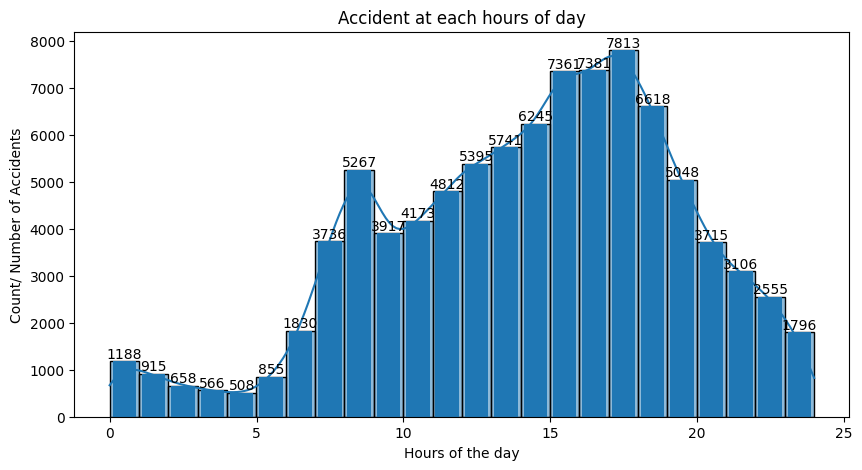

In [53]:
plt.figure(figsize=(10,5))
a = sns.histplot(time, bins=24, kde=True)
plt.title("Accident at each hours of day")
plt.ylabel("Count/ Number of Accidents")
plt.xlabel("Hours of the day")

# Calculate the bin heights
count, bins, _ = a.hist(time, bins=24, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(count, bins[:-1]):
    height = count
    a.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')
    
plt.show()

The graph above shows that the **most accidents** occurred by **6.pm( 18.00 p.m) with 7,813** counts followed by 5p.m with 7,381 counts of accidents.
The **least accidents** occurs around **5a.m in the morning with 508** counts of accidents.

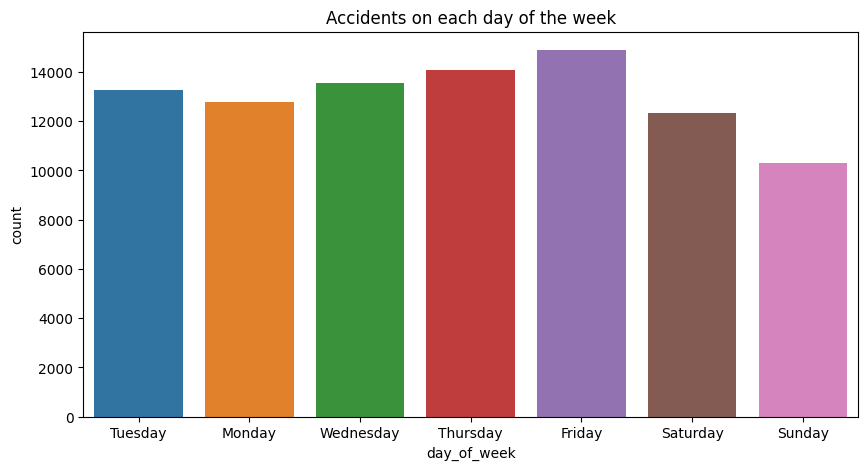

In [54]:
# Create a copy of the DataFrame before replacing values
Days_of_Accident_copy = Accident_df.copy()

# Replace the numerical values with day names
Days_of_Accident_copy['day_of_week'].replace(
    {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'},
    inplace=True
)

# Create the countplot using the original numerical values
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=Days_of_Accident_copy, x='day_of_week', ax=ax)
ax.set_title('Accidents on each day of the week')

plt.show()


The diagram above depicts that the highest number of accidents over 14,000 occurs on the **6th of day of the week**. The highest number of accidents occurs on **Friday** since the first day of the week is Sunday while the last day is Saturday

In [55]:
Sigificant_Time_Accid_df =Accident_df['Time'].value_counts().tolist()

In [56]:
# Check the significance time of  accidents in hours of the day using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sigificant_Time_Accid_df )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.493, p=0.000
Probably not Gaussian


C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


This implies that the **pvalue is 0.000 and is less than 0.05**; therefore, accidents in hours of the  day is **Probably not Gaussian**. What this means is that there are significant hours of the day in which accidents occurs.

In [57]:
# list accidents that occurs in days of the week
Sigificant_Day_Accid_df = Accident_df['day_of_week'].value_counts().tolist()

In [58]:
# Checks the significance of accidents in week days using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sigificant_Day_Accid_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.950, p=0.730
Probably Gaussian


The result shows that the **pvalue is 0.730 which is greater than 0.05** meaning that accidents in days of the week is **Probably Gaussian** therefore,there is no significant day of the week in which accident occurs.

### For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? A focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

In [59]:
# #To check the vehicle types that corresponds to motorcycle 125cc and under, motorcycle 125cc to 500cc and motorcycle over 500cc
Vehicle_df.vehicle_type.unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

#### For Motorcycle 125cc and under

In [60]:
M_cycle_125cc_under= Vehicle_df[(Vehicle_df.vehicle_type == 3) | (Vehicle_df.vehicle_type == 2)]
M_cycle_125cc_under

vehicle_index accident_index  accident_year accident_reference  \
12             681728  2020010228020           2020          010228020   
32             681748  2020010228077           2020          010228077   
33             681749  2020010228086           2020          010228086   
36             681752  2020010228097           2020          010228097   
58             681774  2020010228148           2020          010228148   
...               ...            ...            ...                ...   
167091         848807  2020991008618           2020          991008618   
167149         848865  2020991009778           2020          991009778   
167195         848911  2020991010130           2020          991010130   
167292         849008  2020991011809           2020          991011809   
167301         849017  2020991012311           2020          991012311   

        vehicle_reference  vehicle_type  towing_and_articulation  \
12                      1             3                        0   
32                      2             2                        0   
33                      1             3                        0   
36                      2             3                        0   
58                      1             3                        0   
...                   ...           ...                      ...   
167091                  1             3                        0   
167149                  2             3                        0   
167195                  2             3                        0   
167292                  2             3                        0   
167301                  1             3                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
12                      3                       7                     3   
32                     18                       8                     4   
33                     18                       7                     3   
36                     18                       1                     5   
58                     14                       5                     1   
...                   ...                     ...                   ...   
167091                 18                       5                     1   
167149                 18                       5                     1   
167195                 14                       7                     3   
167292                  5                       7                     3   
167301                 18                       8                     4   

        vehicle_location_restricted_lane  junction_location  \
12                                     0                  1   
32                                     9                  6   
33                                     9                  0   
36                                     0                  0   
58                                     0                  2   
...                                  ...                ...   
167091                                 0                  8   
167149                                 0                  8   
167195                                 0                  0   
167292                                 0                  2   
167301                                 0                  1   

        skidding_and_overturning  hit_object_in_carriageway  \
12                             0                          0   
32                             5                          4   
33                             0                         11   
36                             0                          0   
58                             0                          0   
...                          ...                        ...   
167091                         0                          0   
167149                         0                          0   
167195                         0                          0   
167292        

#### Merging the accident and M_cycle_125cc_under dataframes based on the **accident_index** column using an inner join

In [61]:
#Performing innerjoin between two dataframes (Accident_df and M_cycle_125cc_under )
Acci_125cc_under_df = pd.merge(Accident_df, M_cycle_125cc_under, on='accident_index', how='inner')
Acci_125cc_under_df

accident_index  accident_year_x accident_reference_x  \
0     2020010228020             2020            010228020   
1     2020010228077             2020            010228077   
2     2020010228086             2020            010228086   
3     2020010228097             2020            010228097   
4     2020010228148             2020            010228148   
...             ...              ...                  ...   
8646  2020991008618             2020            991008618   
8647  2020991009778             2020            991009778   
8648  2020991010130             2020            991010130   
8649  2020991011809             2020            991011809   
8650  2020991012311             2020            991012311   

      location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                  529718.0                192342.0  -0.127840  51.614971   
1                  531477.0                174550.0  -0.109087  51.454673   
2                  531043.0                176304.0  -0.114680  51.470537   
3                  528428.0                179923.0  -0.150994  51.503659   
4                  518467.0                185248.0  -0.292651  51.553691   
...                     ...                     ...        ...        ...   
8646               340683.0                674031.0  -2.951564  55.955619   
8647               276790.0                667071.0  -3.971138  55.880977   
8648               250655.0                658068.0  -4.383591  55.792760   
8649               268116.0                656638.0  -4.104624  55.785004   
8650               311646.0                683727.0  -3.419652  56.038240   

      police_force  accident_severity  number_of_vehicles  \
0                1                  3                   2   
1                1                  2                   2   
2                1                  3                   1   
3                1                  3                   2   
4                1                  3                   1   
...            ...                ...                 ...   
8646            99                  2                   2   
8647            99                  2                   2   
8648            99                  3                   2   
8649            99                  3                   2   
8650            99                  2                   2   

      number_of_casualties  day_of_week                Time  \
0                        1            4 2020-01-01 03:25:00   
1                        1            4 2020-01-01 08:00:00   
2                        1            4 2020-01-01 14:00:00   
3                        1            4 2020-01-01 14:37:00   
4                        1            4 2020-01-01 19:05:00   
...                    ...          ...                 ...   
8646                     2            1 2020-12-20 07:20:00   
8647                     1            5 2020-12-17 20:50:00   
8648                     1            5 2020-12-24 16:30:00   
8649                     1            4 2020-12-16 17:30:00   
8650                     1            2 2020-12-28 17:55:00   

      local_authority_district local_authority_ons_district  \
0                           32                    E09000010   
1                            9                    E09000022   
2                            9                    E09000022   
3                            1                    E09000033   
4                           28                    E09000005   
...                        ...                          ...   
8646                       921                    S12000010   
8647                       932                    S12000044   
8648                       922                    S12000011   
8649                       938                    S12000029   
8650                       925                    S12000015   

     local_authority_highway  first_road_class  first_road_number  road_type  \
0                  E

In [62]:
# counts of the mototocycle 125cc and under involved in an accident
Acci_125cc_under_df.vehicle_type.value_counts()

3    7523
2    1128
Name: vehicle_type, dtype: int64

### To extract hour and day of the week for which accidents occur for Motor cycle 125cc and under (M_cycle_125cc_under)

In [63]:
time = pd.DatetimeIndex(Acci_125cc_under_df['Time'])
hour = time.hour
mins = time.minute/60
time = hour + mins

In [64]:
Acci_125cc_under_df['Hour'] = pd.to_datetime(Acci_125cc_under_df['Time']).dt.hour
Acci_125cc_under_df['Hour']

0        3
1        8
2       14
3       14
4       19
        ..
8646     7
8647    20
8648    16
8649    17
8650    17
Name: Hour, Length: 8651, dtype: int64

In [65]:
Acci_125cc_under_df['day_of_Week'] = pd.to_datetime(Acci_125cc_under_df['Time']).dt.dayofweek
Acci_125cc_under_df['day_of_Week']

0       2
1       2
2       2
3       2
4       2
       ..
8646    6
8647    3
8648    3
8649    2
8650    0
Name: day_of_Week, Length: 8651, dtype: int64

In [66]:
Acci_125cc_under_df_grouped = Acci_125cc_under_df.groupby(['Hour', 'day_of_week']).size().reset_index(name='AccidentCount')
Acci_125cc_under_df_grouped

Hour  day_of_week  AccidentCount
0       0            1             17
1       0            2              9
2       0            3              8
3       0            4             12
4       0            5              8
..    ...          ...            ...
163    23            3             21
164    23            4             16
165    23            5             28
166    23            6             32
167    23            7             25

[168 rows x 3 columns]

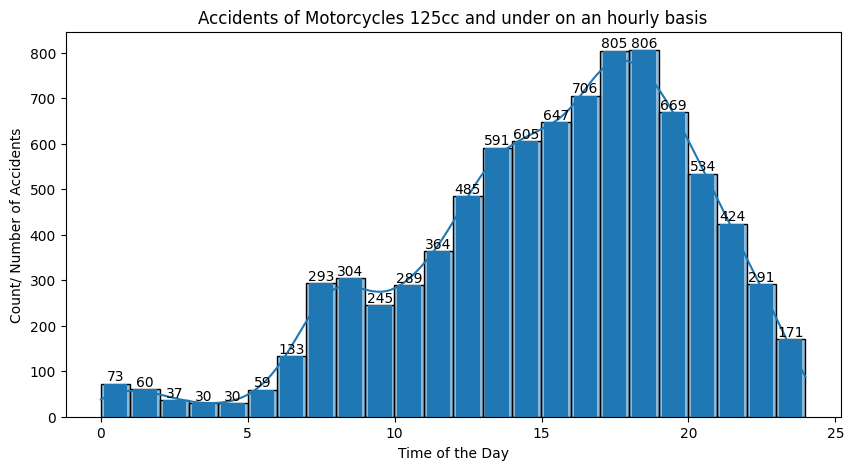

In [67]:
plt.figure(figsize=(10,5))
ax = sns.histplot(time, bins=24, kde=True)


# Adding labels and title
ax.set_xlabel('Time of the Day')
ax.set_ylabel('Count/ Number of Accidents')
ax.set_title('Accidents of Motorcycles 125cc and under on an hourly basis')

# Calculate the bin heights
counts, bins, _ = ax.hist(time, bins=24, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The highest count of motorcycle 125cc and under accidents occurs at 7p.m(19:00 hours) with a count of 806 followed by 6p.m with a count of 805. The least time for which accident occurs is at 4.am and 5am respectively with a count of 30 accidents each respectively.

In [68]:
# list of motor cycle 125cc and under accidents that occurs in hours of the day
Sig_Time_Accid_125cc_under_df = Acci_125cc_under_df['Time'].value_counts().tolist()

# Check the significance of hours of the day of pedestrians involved in an accidents using Shapiro-Wilk Normality Test
stat, p = shapiro(Sig_Time_Accid_125cc_under_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.238, p=0.000
Probably not Gaussian


C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


This implies that the **pvalue is 0.000 and is less than 0.05**; therefore, motorcycle 125cc and under involved in accidents in hours of the  day is **Probably not Gaussian**. What this means is that there are significant hours of the day in which accidents occurs.

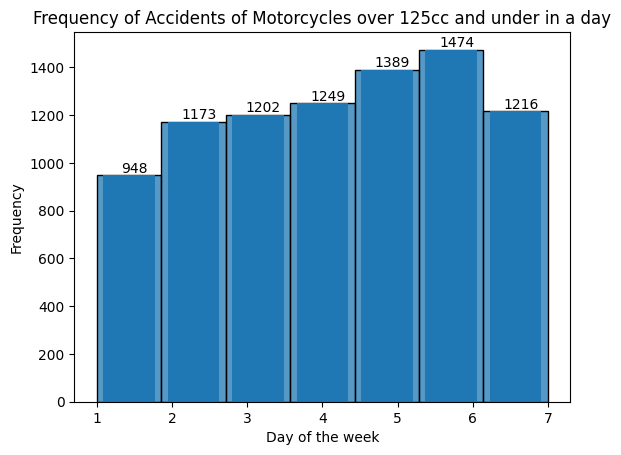

In [69]:
# Days of the week which accidents occur
day = Acci_125cc_under_df.day_of_week
ax = sns.histplot(day, bins=7, kde=False)

# Adding labels and title
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Accidents of Motorcycles over 125cc and under in a day')

# Calculate the bin heights
counts, bins, _ = ax.hist(day, bins=7, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The diagram above depicts that the highest number of accidents **1,474 occurs on the 6th of day of the week(Friday)** while the **least days** of accidents occuring with **948 accidents is on sunday**. Note the first day of the week is Sunday while the last day is Saturday

In [70]:
# list accidents that occurs in days of the week
Sig_Day_Accid_125cc_under_df = Accident_df['day_of_week'].value_counts().tolist()

In [71]:
# Checks the significance of accidents in week days using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sig_Day_Accid_125cc_under_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.950, p=0.730
Probably Gaussian


The result shows that the **pvalue is 0.730 which is greater than 0.05** meaning that accidents in days of the week is **Probably Gaussian** therefore,there is no significant day of the week in which accident occurs and the stat is significant at 0.950

C:\Users\760676\AppData\Local\Temp\ipykernel_11696\1584390822.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=Acci_125cc_under_df_grouped.pivot('day_of_week', 'Hour','AccidentCount'), annot=True, annot_kws={"weight": "bold"})


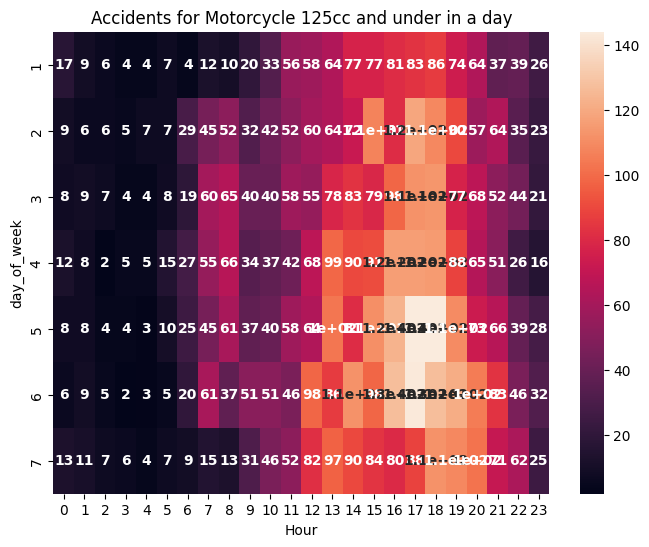

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=Acci_125cc_under_df_grouped.pivot('day_of_week', 'Hour','AccidentCount'), annot=True, annot_kws={"weight": "bold"})
plt.title('Accidents for Motorcycle 125cc and under in a day')
plt.show()

#### For Motorcycle 125cc to 500cc

In [73]:
M_cycle_125cc_to_500cc = Vehicle_df[(Vehicle_df['vehicle_type']) == 4]
M_cycle_125cc_to_500cc

vehicle_index accident_index  accident_year accident_reference  \
92             681808  2020010228247           2020          010228247   
106            681822  2020010228265           2020          010228265   
618            682334  2020010229213           2020          010229213   
722            682438  2020010229461           2020          010229461   
750            682466  2020010229496           2020          010229496   
...               ...            ...            ...                ...   
166361         848077  2020990997907           2020          990997907   
166744         848460  2020991003397           2020          991003397   
166837         848553  2020991004865           2020          991004865   
167039         848755  2020991008057           2020          991008057   
167304         849020  2020991012353           2020          991012353   

        vehicle_reference  vehicle_type  towing_and_articulation  \
92                      1             4                        0   
106                     1             4                        0   
618                     1             4                        0   
722                     2             4                        0   
750                     1             4                        0   
...                   ...           ...                      ...   
166361                  1             4                        0   
166744                  3             4                        0   
166837                  2             4                        0   
167039                  2             4                        0   
167304                  2             4                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
92                     13                       5                     1   
106                    13                       4                     8   
618                    99                       9                     9   
722                     4                       1                     5   
750                    15                       3                     7   
...                   ...                     ...                   ...   
166361                 18                       8                     4   
166744                 17                       4                     8   
166837                 17                       8                     5   
167039                 18                       7                     2   
167304                 18                       6                     2   

        vehicle_location_restricted_lane  junction_location  \
92                                     0                  1   
106                                    0                  8   
618                                   99                  9   
722                                    0                  0   
750                                    4                  0   
...                                  ...                ...   
166361                                 9                  0   
166744                                 0                  0   
166837                                 0                  3   
167039                                 0                  0   
167304                                 0                  1   

        skidding_and_overturning  hit_object_in_carriageway  \
92                             2                          0   
106                            0                         11   
618                            9                         99   
722                            2                          0   
750                            2                         10   
...                          ...                        ...   
166361                         1                          0   
166744                         0                          0   
166837                         0                          0   
167039        

#### Merging the accident and M_cycle_125cc_500cc dataframes based on the **accident_index** column using an inner join

In [74]:
#Performing innerjoin between two dataframes (Accident_df and M_cycle_125cc_500cc)
Acci_125cc_to_500cc_df = pd.merge(Accident_df, M_cycle_125cc_to_500cc, on='accident_index', how='inner')
Acci_125cc_to_500cc_df

accident_index  accident_year_x accident_reference_x  \
0     2020010228247             2020            010228247   
1     2020010228265             2020            010228265   
2     2020010229213             2020            010229213   
3     2020010229461             2020            010229461   
4     2020010229496             2020            010229496   
...             ...              ...                  ...   
1686  2020990997907             2020            990997907   
1687  2020991003397             2020            991003397   
1688  2020991004865             2020            991004865   
1689  2020991008057             2020            991008057   
1690  2020991012353             2020            991012353   

      location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                  540175.0                190325.0   0.022290  51.594341   
1                  530914.0                171051.0  -0.118477  51.423358   
2                  537758.0                180583.0  -0.016392  51.507395   
3                  525782.0                175011.0  -0.190844  51.460109   
4                  525530.0                176729.0  -0.193861  51.475605   
...                     ...                     ...        ...        ...   
1686               339411.0                734101.0  -2.985692  56.495066   
1687               361508.0                862416.0  -2.646571  57.649987   
1688               322240.0                672056.0  -3.246292  55.935244   
1689               324394.0                672836.0  -3.212041  55.942595   
1690               318037.0                745230.0  -3.336269  56.591779   

      police_force  accident_severity  number_of_vehicles  \
0                1                  3                   2   
1                1                  3                   1   
2                1                  3                   2   
3                1                  3                   3   
4                1                  3                   3   
...            ...                ...                 ...   
1686            99                  2                   1   
1687            99                  2                   3   
1688            99                  2                   2   
1689            99                  3                   2   
1690            99                  3                   2   

      number_of_casualties  day_of_week                Time  \
0                        1            5 2020-02-01 14:17:00   
1                        1            5 2020-02-01 17:35:00   
2                        1            3 2020-07-01 16:33:00   
3                        1            5 2020-09-01 18:40:00   
4                        1            5 2020-09-01 20:31:00   
...                    ...          ...                 ...   
1686                     1            7 2020-10-24 18:45:00   
1687                     3            3 2020-01-12 16:23:00   
1688                     1            1 2020-06-12 09:40:00   
1689                     1            6 2020-11-12 17:55:00   
1690                     1            5 2020-06-08 15:45:00   

      local_authority_district local_authority_ons_district  \
0                           14                    E09000026   
1                            9                    E09000022   
2                            5                    E09000030   
3                           10                    E09000032   
4                           11                    E09000013   
...                        ...                          ...   
1686                       918                    S12000042   
1687                       911                    S12000034   
1688                       923                    S12000036   
1689                       923                    S12000036   
1690                       934                    S12000024   

     local_authority_highway  first_road_class  first_road_number  road_type  \
0                  E

In [75]:
# counts of the mototocycle 125cc to 500cc involved in an accident
Acci_125cc_to_500cc_df.vehicle_type.value_counts()

4    1691
Name: vehicle_type, dtype: int64

### To extract hour and day of the week for which accidents occur for Motor cycle 125cc to 500cc (M_cycle_125cc_to_500cc)

In [76]:
Acci_125cc_to_500cc_df['Hour'] = pd.to_datetime(Acci_125cc_to_500cc_df['Time']).dt.hour
Acci_125cc_to_500cc_df['Hour']

0       14
1       17
2       16
3       18
4       20
        ..
1686    18
1687    16
1688     9
1689    17
1690    15
Name: Hour, Length: 1691, dtype: int64

In [77]:
Acci_125cc_to_500cc_df['day_of_Week'] = pd.to_datetime(Acci_125cc_to_500cc_df['Time']).dt.dayofweek
Acci_125cc_to_500cc_df['day_of_Week']

0       5
1       5
2       2
3       1
4       1
       ..
1686    5
1687    6
1688    4
1689    3
1690    0
Name: day_of_Week, Length: 1691, dtype: int64

In [78]:
Acci_125cc_to_500cc_df_grouped = Acci_125cc_to_500cc_df.groupby(['Hour', 'day_of_week']).size().reset_index(name='AccidentCount')
Acci_125cc_to_500cc_df_grouped

Hour  day_of_week  AccidentCount
0       0            1              4
1       0            2              3
2       0            5              1
3       0            6              4
4       0            7              5
..    ...          ...            ...
148    23            3              6
149    23            4              5
150    23            5              4
151    23            6             11
152    23            7              5

[153 rows x 3 columns]

In [79]:
time = pd.DatetimeIndex(Acci_125cc_to_500cc_df['Time'])
hour = time.hour
mins = time.minute/60
time = hour + mins

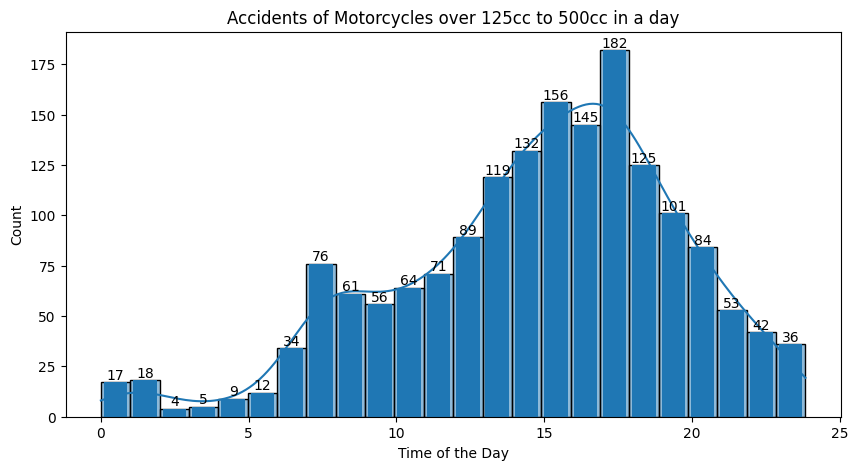

In [80]:
#To get the histogram for the day
plt.figure(figsize=(10,5))
ax = sns.histplot(time, bins=24, kde=True)


# Adding labels and title
ax.set_xlabel('Time of the Day')
ax.set_ylabel('Count')
ax.set_title('Accidents of Motorcycles over 125cc to 500cc in a day')

# Calculate the bin heights
counts, bins, _ = ax.hist(time, bins=24, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The highest count of motorcycle 125cc to over 500cc accidents occurs at **6p.m(18:00 hours) with a count of 182** accidents followed by **4p.m(16:00 hours) with a count of 156**. The **least time** for which accident occurs is at **3a.m and 4a.m respectively with a count of 4 and 5 accidents each** respectively.

In [81]:
Sig_Time_Accid125_500cc_df =Accident_df['Time'].value_counts().tolist()
# Check the significance time of  accidents in hours of the day using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sig_Time_Accid125_500cc_df )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.493, p=0.000
Probably not Gaussian


C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


This implies that the **pvalue is 0.000 and is less than 0.05**; therefore, accidents in hours of the  day is **Probably not Gaussian**. What this means is that there are significant hours of the day in which accidents occurs.

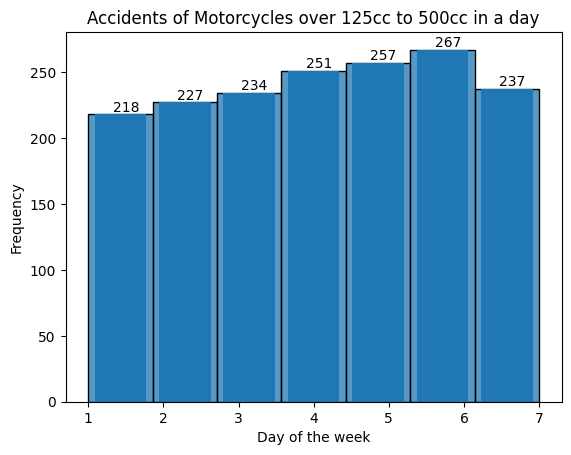

In [82]:
# Days of the week which accidents occur
day = Acci_125cc_to_500cc_df.day_of_week 
ax = sns.histplot(day, bins=7, kde=False)

# Adding labels and title
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')
ax.set_title('Accidents of Motorcycles over 125cc to 500cc in a day')

# Calculate the bin heights
counts, bins, _ = ax.hist(day, bins=7, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The diagram above depicts that the **highest number of accidents 267 occurs on the 6th of day of the week(Friday)** while the **least day of accidents occuring with 218 accidents is on sunday**. Note the first day of the week is Sunday while the last day is Saturday

In [83]:
# list mcycle 125cc to 500cc accidents that occurs in days of the week
Sigificant_Day_Accid125cc_500cc_df = Accident_df['day_of_week'].value_counts().tolist()
# Checks the significance of accidents in week days using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sigificant_Day_Accid125cc_500cc_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.950, p=0.730
Probably Gaussian


The result shows that the **pvalue is 0.730 which is greater than 0.05** meaning that accidents in days of the week is **Probably Gaussian** therefore,there is no significant day of the week in which accident occurs.


C:\Users\760676\AppData\Local\Temp\ipykernel_11696\4076284015.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=Acci_125cc_to_500cc_df_grouped.pivot('day_of_week', 'Hour','AccidentCount'), annot=True, annot_kws={"weight": "bold"})


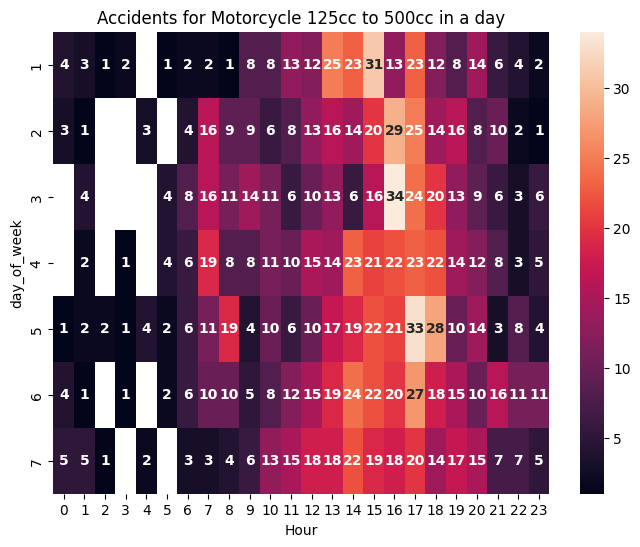

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=Acci_125cc_to_500cc_df_grouped.pivot('day_of_week', 'Hour','AccidentCount'), annot=True, annot_kws={"weight": "bold"})
plt.title('Accidents for Motorcycle 125cc to 500cc in a day')
plt.show()

#### For Motorcycle over 500cc

In [85]:
M_cycle_over_500cc= Vehicle_df[(Vehicle_df.vehicle_type == 5)]
M_cycle_over_500cc

vehicle_index accident_index  accident_year accident_reference  \
119            681835  2020010228283           2020          010228283   
334            682050  2020010228659           2020          010228659   
381            682097  2020010228738           2020          010228738   
402            682118  2020010228796           2020          010228796   
450            682166  2020010228865           2020          010228865   
...               ...            ...            ...                ...   
166742         848458  2020991003397           2020          991003397   
166754         848470  2020991003505           2020          991003505   
166835         848551  2020991004857           2020          991004857   
167128         848844  2020991009395           2020          991009395   
167371         849087  2020991030297           2020          991030297   

        vehicle_reference  vehicle_type  towing_and_articulation  \
119                     2             5                        0   
334                     2             5                        0   
381                     3             5                        0   
402                     2             5                        5   
450                     2             5                        0   
...                   ...           ...                      ...   
166742                  1             5                        0   
166754                  1             5                        0   
166835                  2             5                        0   
167128                  1             5                        0   
167371                  2             5                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
119                    18                       1                     5   
334                    18                       5                     1   
381                    18                       7                     3   
402                    15                       1                     5   
450                    18                       1                     5   
...                   ...                     ...                   ...   
166742                 13                       8                     3   
166754                 17                       8                     4   
166835                 18                       7                     3   
167128                 18                       8                     4   
167371                 16                       6                     2   

        vehicle_location_restricted_lane  junction_location  \
119                                    0                  8   
334                                    0                  8   
381                                    0                  0   
402                                    0                  0   
450                                    0                  0   
...                                  ...                ...   
166742                                 0                  0   
166754                                 0                  0   
166835                                 0                  0   
167128                                 0                  4   
167371                                 0                  1   

        skidding_and_overturning  hit_object_in_carriageway  \
119                            0                          0   
334                            0                          0   
381                            0                          0   
402                            5                          0   
450                            0                          0   
...                          ...                        ...   
166742                         0                          0   
166754                         1                          0   
166835                         5                          0   
167128        

#### Merging the accident and M_cycle_over_500cc dataframes based on the accident_index column using an inner join

In [86]:
#Performing innerjoin between two dataframes (Accident_df and M_cycle_over_500cc)
Acci_over_500cc_df = pd.merge(Accident_df, M_cycle_over_500cc, on='accident_index', how='inner')
Acci_over_500cc_df

accident_index  accident_year_x accident_reference_x  \
0     2020010228283             2020            010228283   
1     2020010228659             2020            010228659   
2     2020010228738             2020            010228738   
3     2020010228796             2020            010228796   
4     2020010228865             2020            010228865   
...             ...              ...                  ...   
3779  2020991003397             2020            991003397   
3780  2020991003505             2020            991003505   
3781  2020991004857             2020            991004857   
3782  2020991009395             2020            991009395   
3783  2020991030297             2020            991030297   

      location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                  524504.0                178619.0  -0.207961  51.492817   
1                  530728.0                187433.0  -0.115087  51.570623   
2                  515249.0                183075.0  -0.339757  51.534826   
3                  530758.0                179386.0  -0.117641  51.498300   
4                  548578.0                178347.0   0.138462  51.484565   
...                     ...                     ...        ...        ...   
3779               361508.0                862416.0  -2.646571  57.649987   
3780               326207.0                669768.0  -3.182182  55.915317   
3781               338547.0                731820.0  -2.999184  56.474464   
3782               276154.0                663826.0  -3.979814  55.851675   
3783               383664.0                810646.0  -2.271903  57.186317   

      police_force  accident_severity  number_of_vehicles  \
0                1                  2                   2   
1                1                  3                   2   
2                1                  3                   4   
3                1                  3                   2   
4                1                  3                   2   
...            ...                ...                 ...   
3779            99                  2                   3   
3780            99                  2                   1   
3781            99                  2                   2   
3782            99                  3                   2   
3783            99                  2                   2   

      number_of_casualties  day_of_week                Time  \
0                        1            5 2020-02-01 15:24:00   
1                        1            1 2020-05-01 16:35:00   
2                        1            2 2020-06-01 08:34:00   
3                        1            2 2020-06-01 17:40:00   
4                        1            3 2020-07-01 00:50:00   
...                    ...          ...                 ...   
3779                     3            3 2020-01-12 16:23:00   
3780                     1            5 2020-11-26 12:50:00   
3781                     1            2 2020-07-12 16:18:00   
3782                     1            3 2020-12-22 13:15:00   
3783                     1            4 2020-04-15 12:42:00   

      local_authority_district local_authority_ons_district  \
0                           11                    E09000013   
1                            3                    E09000019   
2                           27                    E09000009   
3                            9                    E09000022   
4                           18                    E09000004   
...                        ...                          ...   
3779                       911                    S12000034   
3780                       923                    S12000036   
3781                       918                    S12000042   
3782                       932                    S12000044   
3783                       910                    S12000033   

     local_authority_highway  first_road_class  first_road_number  road_type  \
0                  E

In [87]:
# counts of the mototocycle over 500cc involved in an accident
Acci_over_500cc_df.vehicle_type.value_counts()

5    3784
Name: vehicle_type, dtype: int64

### To extract hour and day of the week for which accidents occur for Motor cycle over 500cc (M_cycle_over_500cc)

In [88]:
Acci_over_500cc_df['Hour'] = pd.to_datetime(Acci_over_500cc_df['Time']).dt.hour
Acci_over_500cc_df['Hour']

0       15
1       16
2        8
3       17
4        0
        ..
3779    16
3780    12
3781    16
3782    13
3783    12
Name: Hour, Length: 3784, dtype: int64

In [89]:
Acci_over_500cc_df['day_of_Week'] = pd.to_datetime(Acci_over_500cc_df['Time']).dt.dayofweek
Acci_over_500cc_df['day_of_Week']

0       5
1       4
2       0
3       0
4       2
       ..
3779    6
3780    3
3781    6
3782    1
3783    2
Name: day_of_Week, Length: 3784, dtype: int64

In [90]:
Acci_over_500cc_df_grouped = Acci_over_500cc_df.groupby(['Hour', 'day_of_week']).size().reset_index(name='AccidentCount')
Acci_over_500cc_df_grouped

Hour  day_of_week  AccidentCount
0       0            1              2
1       0            3              1
2       0            5              3
3       0            6              2
4       0            7              3
..    ...          ...            ...
152    23            3              7
153    23            4              4
154    23            5              5
155    23            6              5
156    23            7              5

[157 rows x 3 columns]

In [91]:
time = pd.DatetimeIndex(Acci_over_500cc_df['Time'])
hour = time.hour
mins = time.minute/60
time = hour + mins

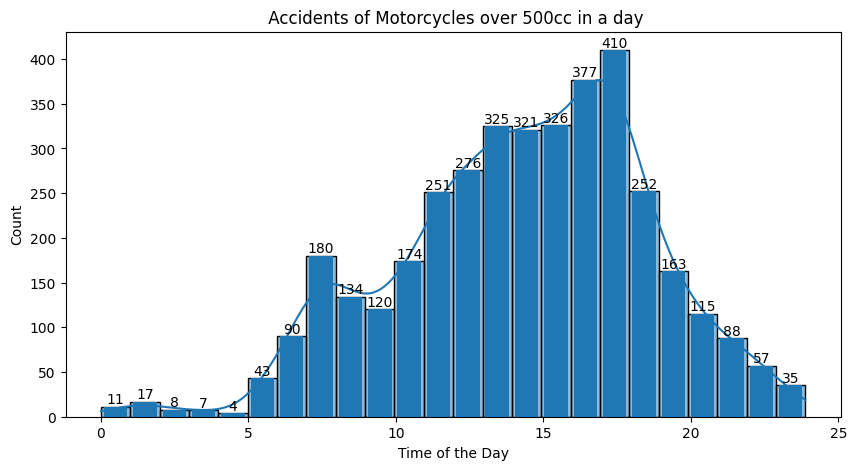

In [92]:
# Days of the week which accidents occur
plt.figure(figsize=(10,5))
ax = sns.histplot(time, bins=24, kde=True)


# Adding labels and title
ax.set_xlabel('Time of the Day')
ax.set_ylabel('Count')
ax.set_title(' Accidents of Motorcycles over 500cc in a day')

# Calculate the bin heights
counts, bins, _ = ax.hist(time, bins=24, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

It can be seen that for **motorcycle 500cc and over,accidents occurs mostly at 6p.m(18:00 hours) with 410 accident counts** while the **least counts of accidents occurs by 5a.m with accident counts of 4**

In [93]:
Sig_Time_Accid500c_over_df =Accident_df['Time'].value_counts().tolist()
# Check the significance time of  accidents in hours of the day using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sig_Time_Accid500c_over_df )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.493, p=0.000
Probably not Gaussian


C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


This implies that the **pvalue is 0.000 and is less than 0.05**; therefore, accidents in hours of the  day is **Probably not Gaussian**. What this means is that there are significant hours of the day in which accidents occurs. with a stat value of 0.493

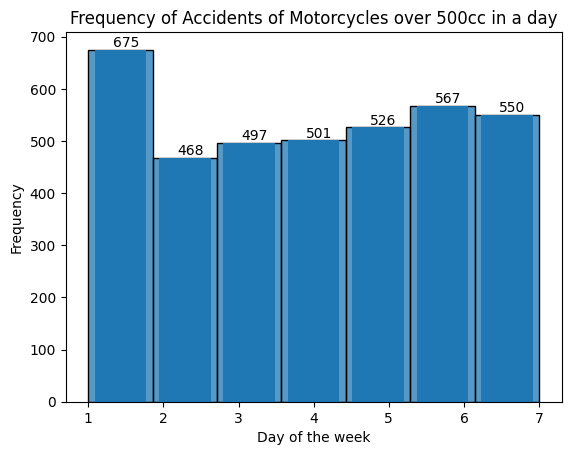

In [94]:
# Days of the week which accidents occur
day = Acci_over_500cc_df.day_of_week
ax = sns.histplot(day, bins=7, kde=False)

# Adding labels and title
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Accidents of Motorcycles over 500cc in a day')

# Calculate the bin heights
counts, bins, _ = ax.hist(day, bins=7, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The day with the **highest** frequency of accident occurring is **Sunday with accident frequency of 675**  while the **least accidents** occured on **monday with a count of 468**

In [95]:
# list accidents that occurs in days of the week
Sig_Day_Accid500cc_over_df = Accident_df['day_of_week'].value_counts().tolist()
# Checks the significance of accidents in week days using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sig_Day_Accid500cc_over_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.950, p=0.730
Probably Gaussian



The result shows that the **pvalue is 0.730 which is greater than 0.05** meaning that accidents in days of the week is **Probably Gaussian** therefore,there is no significant day of the week in which accident occurs. with a stat value that is **0.950 significant**

C:\Users\760676\AppData\Local\Temp\ipykernel_11696\4000885371.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=Acci_over_500cc_df_grouped.pivot('day_of_week', 'Hour','AccidentCount'), annot=True, annot_kws={"weight": "bold"})


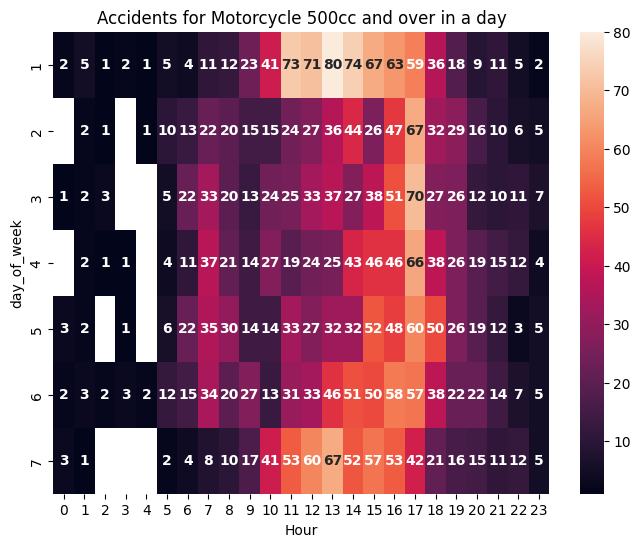

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=Acci_over_500cc_df_grouped.pivot('day_of_week', 'Hour','AccidentCount'), annot=True, annot_kws={"weight": "bold"})
plt.title('Accidents for Motorcycle 500cc and over in a day')
plt.show()

### For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [97]:
Casualty_df.casualty_class.unique()

array([3, 1, 2], dtype=int64)

In [98]:
Pedestrian_df = Casualty_df[Casualty_df.casualty_class == 3]
Pedestrian_df

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115573          600321  2020991023621           2020          991023621   
115574          600322  2020991023880           2020          991023880   
115578          600326  2020991024526           2020          991024526   
115580          600328  2020991029573           2020          991029573   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115573                  1                   2               3   
115574                  1                   1               3   
115578                  1                   1               3   
115580                  1                   1               3   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115573                2               54                     8   
115574                2               58                     9   
115578                1               69                    10   
115580                2               63                     9   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115573                  2                    8                    1   
115574                  3                    5                    1   
115578                  3                    6                    9   
115580                  3                   10                    1   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115573              0                       0   
115574              0                       0   
115578              0                       0   
115580              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

#### Merging the Accident and Pedestrian dataframes based on the accident_index column using an inner join

In [99]:
Pedestrian_Accident_df = pd.merge(Accident_df, Pedestrian_df, on='accident_index', how='inner')
Pedestrian_Accident_df

accident_index  accident_year_x accident_reference_x  \
0      2020010219808             2020            010219808   
1      2020010220496             2020            010220496   
2      2020010220496             2020            010220496   
3      2020010228005             2020            010228005   
4      2020010228006             2020            010228006   
...              ...              ...                  ...   
14745  2020991023621             2020            991023621   
14746  2020991023880             2020            991023880   
14747  2020991024526             2020            991024526   
14748  2020991029573             2020            991029573   
14749  2020991032575             2020            991032575   

       location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                   521389.0                175144.0  -0.254001  51.462262   
1                   529337.0                176237.0  -0.139253  51.470327   
2                   529337.0                176237.0  -0.139253  51.470327   
3                   526432.0                182761.0  -0.178719  51.529614   
4                   538676.0                184371.0  -0.001683  51.541210   
...                      ...                     ...        ...        ...   
14745               341791.0                733677.0  -2.946947  56.491558   
14746               342979.0                731116.0  -2.927095  56.468699   
14747               286242.0                717023.0  -3.841439  56.331864   
14748               257963.0                658891.0  -4.267565  55.802353   
14749               240402.0                681950.0  -4.561040  56.003843   

       police_force  accident_severity  number_of_vehicles  \
0                 1                  3                   1   
1                 1                  3                   1   
2                 1                  3                   1   
3                 1                  3                   1   
4                 1                  2                   1   
...             ...                ...                 ...   
14745            99                  2                   1   
14746            99                  3                   1   
14747            99                  3                   1   
14748            99                  3                   1   
14749            99                  3                   1   

       number_of_casualties  day_of_week                Time  \
0                         1            3 2020-04-02 09:00:00   
1                         2            2 2020-04-27 13:55:00   
2                         2            2 2020-04-27 13:55:00   
3                         1            4 2020-01-01 01:25:00   
4                         1            4 2020-01-01 01:50:00   
...                     ...          ...                 ...   
14745                     1            3 2020-10-11 10:30:00   
14746                     1            2 2020-12-14 17:00:00   
14747                     1            3 2020-11-17 12:00:00   
14748                     1            6 2020-11-13 15:05:00   
14749                     1            3 2020-08-25 13:50:00   

       local_authority_district local_authority_ons_district  \
0                            10                    E09000032   
1                             9                    E09000022   
2                             9                    E09000022   
3                             1                    E09000033   
4                            17                    E09000025   
...                         ...                          ...   
14745                       918                    S12000042   
14746                       918                    S12000042   
14747                       934                    S12000024   
14748                       922                    S12000011   
14749                       916                    S12000039   

      local_authority_highway  first_road

In [100]:
### To extract hour and day of the week for which Pedestrians are involved in accidents 
time = pd.DatetimeIndex(Pedestrian_Accident_df['Time'])
hour = time.hour
mins = time.minute/60
time = hour + mins

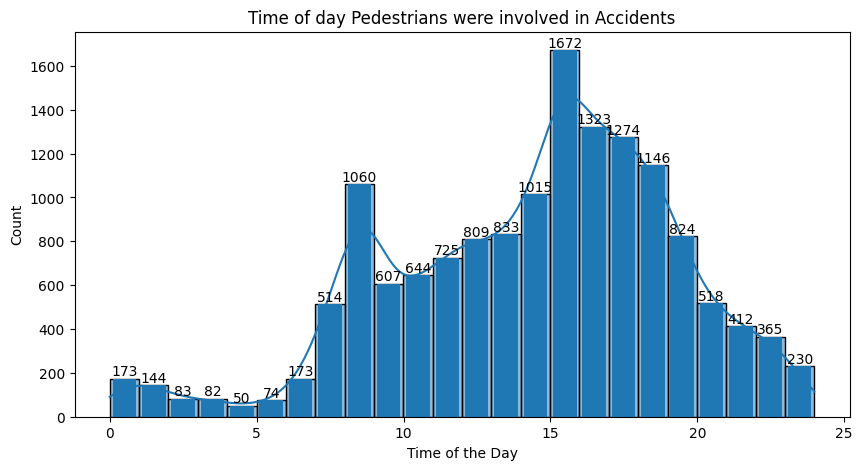

In [101]:
#To get the histogram for the day
plt.figure(figsize=(10,5))
ax = sns.histplot(time, bins=24, kde=True)


# Adding labels and title
ax.set_xlabel('Time of the Day')
ax.set_ylabel('Count')
ax.set_title('Time of day Pedestrians were involved in Accidents')

# Calculate the bin heights
counts, bins, _ = ax.hist(time, bins=24, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The count of accidents for which **pedestrians** were involved in was at its **peak by 4p.m(16:00 hours) with 1,672 accident counts**. This can be associated with rush hour of the **close of work or school runs** and everyone scrambling to get to their destination on time without minding the road rules and regulations.
The **least accidents occured at 5a.m with 50 accident counts**.

In [102]:
Sig_Time_Pedestrian_Accident_df = Accident_df['Time'].value_counts().tolist()
# Check the significance time of  accidents in hours of the day using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sig_Time_Pedestrian_Accident_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.493, p=0.000
Probably not Gaussian


C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The result shows that the pvalue is 0.000 which is less than 0.05 meaning that pedestrians accidents in hours of the day is probably not Gaussian which means that there is significant hours of the day in which the accident occurs.

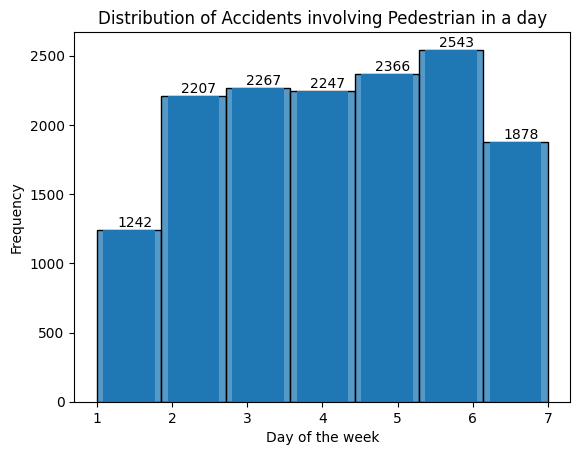

In [103]:
# Days of the week which accidents occur
day = Pedestrian_Accident_df.day_of_week
ax = sns.histplot(day, bins=7, kde=False)

# Adding labels and title
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Accidents involving Pedestrian in a day')

# Calculate the bin heights
counts, bins, _ = ax.hist(day, bins=7, rwidth=0.8)

# Annotate each bar with its count
for count, x in zip(counts, bins[:-1]):
    height = count
    ax.text(x + 0.5, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The days of the week with the **most frequency** of pedestrians being involved in accidents **is on Friday with 2,543** accident frequency followed by thursday with 2,366.
The **least day is on sunday with 1,242 accident frequency**

In [104]:
# list accidents that occurs in days of the week
Sigificant_Day_Pedestrian_df = Accident_df['day_of_week'].value_counts().tolist()
# Checks the significance of accidents in week days using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(Sigificant_Day_Pedestrian_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.950, p=0.730
Probably Gaussian


The result shows that the pvalue is 0.730 which is less than 0.05 meaning that pedestrians accidents in hours of the day is probably  Gaussian which means that there are no significant hours of the day in which the accident occurs.

### Exploring the impact of selected variables on accident severity using the apriori algorithm

In [105]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [107]:
Accident_df['accident_severity'].value_counts()

3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64

In [108]:
#To create dummy variables(One hot encoding)
Severity = pd.get_dummies(Accident_df.accident_severity, prefix='severity')
Weather = pd.get_dummies(Accident_df.weather_conditions, prefix='weather')
Speed = pd.get_dummies(Accident_df.speed_limit, prefix='speed')

Sev_Wea_Spe_df = pd.concat([Severity, Weather, Speed], axis=1)
Sev_Wea_Spe_df

severity_1  severity_2  severity_3  weather_-1  weather_1  weather_2  \
0               0           0           1           0          0          0   
1               0           0           1           0          1          0   
2               0           0           1           0          1          0   
3               0           1           0           0          1          0   
4               0           0           1           0          1          0   
...           ...         ...         ...         ...        ...        ...   
91194           0           1           0           0          1          0   
91195           0           0           1           0          1          0   
91196           0           1           0           0          1          0   
91197           0           0           1           0          1          0   
91198           0           0           1           0          1          0   

       weather_3  weather_4  weather_5  weather_6  weather_7  weather_8  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
91194          0          0          0          0          0          0   
91195          0          0          0          0          0          0   
91196          0          0          0          0          0          0   
91197          0          0          0          0          0          0   
91198          0          0          0          0          0          0   

       weather_9  speed_-1  speed_20  speed_30  speed_40  speed_50  speed_60  \
0              1         0         1         0         0         0         0   
1              0         0         1         0         0         0         0   
2              0         0         0         1         0         0         0   
3              0         0         0         1         0         0         0   
4              0         0         0         1         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
91194          0         0         0         1         0         0         0   
91195          0         0         0         1         0         0         0   
91196          0         0         0         0         0         0         1   
91197          0         0         0         1         0         0         0   
91198          0         0         0         1         0         0         0   

       speed_70  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
91194         0  
91195         0  
91196         0  
91197         0  
91198         0  

[91199 rows x 20 columns]

In [109]:
Sev_Wea_Spe_df = pd.concat([Severity, Weather, Speed], axis=1)
Sev_Wea_Spe_df

severity_1  severity_2  severity_3  weather_-1  weather_1  weather_2  \
0               0           0           1           0          0          0   
1               0           0           1           0          1          0   
2               0           0           1           0          1          0   
3               0           1           0           0          1          0   
4               0           0           1           0          1          0   
...           ...         ...         ...         ...        ...        ...   
91194           0           1           0           0          1          0   
91195           0           0           1           0          1          0   
91196           0           1           0           0          1          0   
91197           0           0           1           0          1          0   
91198           0           0           1           0          1          0   

       weather_3  weather_4  weather_5  weather_6  weather_7  weather_8  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
91194          0          0          0          0          0          0   
91195          0          0          0          0          0          0   
91196          0          0          0          0          0          0   
91197          0          0          0          0          0          0   
91198          0          0          0          0          0          0   

       weather_9  speed_-1  speed_20  speed_30  speed_40  speed_50  speed_60  \
0              1         0         1         0         0         0         0   
1              0         0         1         0         0         0         0   
2              0         0         0         1         0         0         0   
3              0         0         0         1         0         0         0   
4              0         0         0         1         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
91194          0         0         0         1         0         0         0   
91195          0         0         0         1         0         0         0   
91196          0         0         0         0         0         0         1   
91197          0         0         0         1         0         0         0   
91198          0         0         0         1         0         0         0   

       speed_70  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
91194         0  
91195         0  
91196         0  
91197         0  
91198         0  

[91199 rows x 20 columns]

In [110]:

for Attri in Sev_Wea_Spe_df:
    Sev_Wea_Spe_df[Attri] = Sev_Wea_Spe_df[Attri].astype(bool).astype(int)
Sev_Wea_Spe_df

severity_1  severity_2  severity_3  weather_-1  weather_1  weather_2  \
0               0           0           1           0          0          0   
1               0           0           1           0          1          0   
2               0           0           1           0          1          0   
3               0           1           0           0          1          0   
4               0           0           1           0          1          0   
...           ...         ...         ...         ...        ...        ...   
91194           0           1           0           0          1          0   
91195           0           0           1           0          1          0   
91196           0           1           0           0          1          0   
91197           0           0           1           0          1          0   
91198           0           0           1           0          1          0   

       weather_3  weather_4  weather_5  weather_6  weather_7  weather_8  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
91194          0          0          0          0          0          0   
91195          0          0          0          0          0          0   
91196          0          0          0          0          0          0   
91197          0          0          0          0          0          0   
91198          0          0          0          0          0          0   

       weather_9  speed_-1  speed_20  speed_30  speed_40  speed_50  speed_60  \
0              1         0         1         0         0         0         0   
1              0         0         1         0         0         0         0   
2              0         0         0         1         0         0         0   
3              0         0         0         1         0         0         0   
4              0         0         0         1         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
91194          0         0         0         1         0         0         0   
91195          0         0         0         1         0         0         0   
91196          0         0         0         0         0         0         1   
91197          0         0         0         1         0         0         0   
91198          0         0         0         1         0         0         0   

       speed_70  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
91194         0  
91195         0  
91196         0  
91197         0  
91198         0  

[91199 rows x 20 columns]

In [111]:
Accid_Ap = apriori(Sev_Wea_Spe_df, min_support=0.2, use_colnames=True)
Accid_Ap

C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets
0  0.201263                       (severity_2)
1  0.783484                       (severity_3)
2  0.775546                        (weather_1)
3  0.573033                         (speed_30)
4  0.603186            (weather_1, severity_3)
5  0.459983             (speed_30, severity_3)
6  0.450137              (weather_1, speed_30)
7  0.359697  (speed_30, weather_1, severity_3)

In [112]:
Accid_Ap['length'] = Accid_Ap['itemsets'].apply(lambda x: len(x))
Accid_Ap

support                           itemsets  length
0  0.201263                       (severity_2)       1
1  0.783484                       (severity_3)       1
2  0.775546                        (weather_1)       1
3  0.573033                         (speed_30)       1
4  0.603186            (weather_1, severity_3)       2
5  0.459983             (speed_30, severity_3)       2
6  0.450137              (weather_1, speed_30)       2
7  0.359697  (speed_30, weather_1, severity_3)       3

In [113]:
Rules = association_rules(Accid_Ap, metric='lift', min_threshold=0.5)
Rules

antecedents              consequents  antecedent support  \
0               (weather_1)             (severity_3)            0.775546   
1              (severity_3)              (weather_1)            0.783484   
2                (speed_30)             (severity_3)            0.573033   
3              (severity_3)               (speed_30)            0.783484   
4               (weather_1)               (speed_30)            0.775546   
5                (speed_30)              (weather_1)            0.573033   
6     (weather_1, speed_30)             (severity_3)            0.450137   
7    (severity_3, speed_30)              (weather_1)            0.459983   
8   (weather_1, severity_3)               (speed_30)            0.603186   
9                (speed_30)  (weather_1, severity_3)            0.573033   
10              (weather_1)   (severity_3, speed_30)            0.775546   
11             (severity_3)    (weather_1, speed_30)            0.783484   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.783484  0.603186    0.777757  0.992690 -0.004442    0.974230   
1             0.775546  0.603186    0.769877  0.992690 -0.004442    0.975365   
2             0.783484  0.459983    0.802717  1.024548  0.011021    1.097488   
3             0.573033  0.459983    0.587099  1.024548  0.011021    1.034068   
4             0.573033  0.450137    0.580413  1.012879  0.005723    1.017589   
5             0.775546  0.450137    0.785534  1.012879  0.005723    1.046572   
6             0.783484  0.359697    0.799084  1.019911  0.007022    1.077643   
7             0.775546  0.359697    0.781979  1.008294  0.002959    1.029505   
8             0.573033  0.359697    0.596328  1.040653  0.014051    1.057709   
9             0.603186  0.359697    0.627708  1.040653  0.014051    1.065865   
10            0.459983  0.359697    0.463798  1.008294  0.002959    1.007115   
11            0.450137  0.359697    0.459099  1.019911  0.007022    1.016570   

    zhangs_metric  
0       -0.031765  
1       -0.032891  
2        0.056116  
3        0.110660  
4        0.056649  
5        0.029780  
6        0.035503  
7        0.015233  
8        0.098446  
9        0.091493  
10       0.036650  
11       0.090164

**Rows 0 and 1**: These rules show an association between severity_3 (Slight) and weather_1 (Fine without high winds). The confidence values are relatively high, indicating that when one of these variables occurs, there's a high likelihood of the other occurring. However, the lift values are close to 1, suggesting a weak association. The negative leverage values indicate less co-occurrence than expected under independence.

**Rows 2 and 3**: These rules suggest a relationship between speed_30 (speed limit of 30) and severity_3 (Slight). The confidence values are relatively high, indicating that when one of these variables occurs, there's a significant likelihood of the other occurring. The lift values suggest a slight positive association. The positive leverage values indicate more co-occurrence than expected under independence.

**Rows 4 and 5**: These rules indicate a potential connection between speed_30 and weather_1(Fine without high winds). The confidence values suggest that when one variable occurs, the other is likely to occur as well. The lift values are close to 1, indicating a weak association.

**Rows 6, 7, 8, 9, 10, and 11**: These rules involve combinations of multiple variables. They suggest relationships between different combinations of speed_30, severity_3(Slight), and weather_1(Fine without high winds). Similar patterns in confidence, lift, leverage, and conviction values can be observed, indicating varying levels of association between these variables.

In summary, these association rules provide insights into relationships between different variables. High confidence values suggest strong relationships, while lift values above 1 suggest positive associations. Leverage and conviction values further provide information about the co-occurrence of variables.

### Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. by filtering on police region

In [114]:
Accident_df.police_force.unique()

array([ 1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23,
       30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50, 52, 53, 54, 55, 60, 61, 62, 63, 99], dtype=int64)

In [115]:
Accident_df['police_force']

0         1
1         1
2         1
3         1
4         1
         ..
91194    99
91195    99
91196    99
91197    99
91198    99
Name: police_force, Length: 91199, dtype: int64

### For Humberside using the police force code 

In [116]:
Accident_PoliceF_df = Accident_df[Accident_df.police_force == 16]
Accident_PoliceF_df

accident_index  accident_year accident_reference  location_easting_osgr  \
37750  2020160914781           2020          160914781               510156.0   
37751  2020160914930           2020          160914930               506050.0   
37752  2020160915008           2020          160915008               497660.0   
37753  2020160915028           2020          160915028               510449.0   
37754  2020160915041           2020          160915041               526236.0   
...              ...            ...                ...                    ...   
39454  2020161014491           2020          161014491               489433.0   
39455  2020161014528           2020          161014528               503756.0   
39456  2020161014544           2020          161014544               511525.0   
39457  2020161014546           2020          161014546               485978.0   
39458  2020161014949           2020          161014949               509443.0   

       location_northing_osgr  longitude   latitude  police_force  \
37750                429221.0  -0.331047  53.747751            16   
37751                428813.0  -0.393424  53.744936            16   
37752                402806.0  -0.528743  53.512895            16   
37753                434112.0  -0.324858  53.791630            16   
37754                410340.0  -0.095008  53.574501            16   
...                       ...        ...        ...           ...   
39454                408637.0  -0.651104  53.566753            16   
39455                439285.0  -0.424674  53.839482            16   
39456                433149.0  -0.308880  53.782750            16   
39457                408912.0  -0.703181  53.569801            16   
39458                428632.0  -0.342063  53.742609            16   

       accident_severity  number_of_vehicles  number_of_casualties  \
37750                  2                   1                     1   
37751                  3                   2                     1   
37752                  3                   1                     1   
37753                  2                   1                     1   
37754                  3                   1                     1   
...                  ...                 ...                   ...   
39454                  3                   2                     1   
39455                  3                   2                     1   
39456                  3                   1                     1   
39457                  3                   2                     2   
39458                  3                   2                     1   

       day_of_week                Time  local_authority_district  \
37750            4 2020-01-01 02:34:00                       228   
37751            5 2020-02-01 11:20:00                       228   
37752            5 2020-02-01 16:17:00                       232   
37753            5 2020-02-01 17:30:00                       228   
37754            5 2020-02-01 22:50:00                       233   
...            ...                 ...                       ...   
39454            6 2020-12-25 15:18:00                       232   
39455            5 2020-12-31 16:50:00                       231   
39456            5 2020-12-24 09:12:00                       228   
39457            3 2020-08-12 12:41:00                       232   
39458            3 2020-12-29 20:18:00                       228   

      local_authority_ons_district local_authority_highway  first_road_class  \
37750                    E06000010               E06000010                 6   
37751                    E06000010               E06000010                 6   
37752                    E06000013               E06000013                 4   
37753                    E06000010               E06000010                 6   
37754                    E06000012               E06000012                 3   
...                            ...                     ...        

In [117]:
Accident_PoliceF_df.lsoa_of_accident_location.nunique()

492

#### Creating an innerjoin between the Accident and Lsoa dataframes

In [118]:
Accid_Lsoa_df = pd.merge(Accident_PoliceF_df, Lsoa_df, left_on='lsoa_of_accident_location', right_on='lsoa01cd')
Accid_Lsoa_df

accident_index  accident_year accident_reference  location_easting_osgr  \
0     2020160914930           2020          160914930               506050.0   
1     2020160918418           2020          160918418               505576.0   
2     2020160936879           2020          160936879               505583.0   
3     2020160947046           2020          160947046               506031.0   
4     2020160951627           2020          160951627               505692.0   
...             ...            ...                ...                    ...   
1658  2020161011040           2020          161011040               478094.0   
1659  2020161011144           2020          161011144               519036.0   
1660  2020161011936           2020          161011936               510941.0   
1661  2020161012614           2020          161012614               504795.0   
1662  2020161012744           2020          161012744               503718.0   

      location_northing_osgr  longitude   latitude  police_force  \
0                   428813.0  -0.393424  53.744936            16   
1                   428756.0  -0.400627  53.744520            16   
2                   428752.0  -0.400523  53.744482            16   
3                   428789.0  -0.393720  53.744724            16   
4                   428758.0  -0.398868  53.744514            16   
...                      ...        ...        ...           ...   
1658                403312.0  -0.823599  53.520707            16   
1659                428776.0  -0.196631  53.741804            16   
1660                432122.0  -0.318108  53.773648            16   
1661                439763.0  -0.408728  53.843568            16   
1662                428641.0  -0.428826  53.743858            16   

      accident_severity  number_of_vehicles  number_of_casualties  \
0                     3                   2                     1   
1                     3                   2                     1   
2                     3                   2                     1   
3                     3                   1                     1   
4                     2                   2                     1   
...                 ...                 ...                   ...   
1658                  3                   2                     2   
1659                  3                   2                     1   
1660                  3                   2                     1   
1661                  3                   5                     1   
1662                  3                   2                     1   

      day_of_week                Time  local_authority_district  \
0               5 2020-02-01 11:20:00                       228   
1               2 2020-01-13 08:00:00                       228   
2               2 2020-02-17 17:20:00                       228   
3               6 2020-03-01 19:00:00                       228   
4               7 2020-05-16 19:40:00                       228   
...           ...                 ...                       ...   
1658            4 2020-12-30 14:20:00                       232   
1659            6 2020-12-18 17:54:00                       231   
1660            1 2020-12-27 18:02:00                       228   
1661            5 2020-05-11 01:40:00                       231   
1662            7 2020-12-26 13:22:00                       231   

     local_authority_ons_district local_authority_highway  first_road_class  \
0                       E06000010               E06000010                 6   
1                       E06000010               E06000010                 4   
2                       E06000010               E06000010                 6   
3                       E06000010               E06000010                 4   
4                       E06000010               E06000010                 4   
...                           ...                     ...               ...   
1658                    E06000013       

In [119]:
Accid_Lsoa_df['lsoa01nm'].value_counts()

Kingston upon Hull 016D          27
Kingston upon Hull 020B          22
Kingston upon Hull 029A          19
Kingston upon Hull 030B          18
Kingston upon Hull 029D          16
                                 ..
North East Lincolnshire 023E      1
Kingston upon Hull 009E           1
Kingston upon Hull 010A           1
Kingston upon Hull 019B           1
East Riding of Yorkshire 034E     1
Name: lsoa01nm, Length: 479, dtype: int64

In [120]:
Accid_Lsoa_df['urban_or_rural_area']

0       1
1       1
2       1
3       1
4       1
       ..
1658    2
1659    1
1660    1
1661    1
1662    1
Name: urban_or_rural_area, Length: 1663, dtype: int64

In [121]:
Accid_Lsoa_df.lsoa01nmw.nunique()

479

In [122]:
Accid_Lsoa_df.lsoa01nm.nunique()

479

In [123]:
Lat_Long_df =Accid_Lsoa_df[['latitude', 'longitude']]
Lat_Long_df

latitude  longitude
0     53.744936  -0.393424
1     53.744520  -0.400627
2     53.744482  -0.400523
3     53.744724  -0.393720
4     53.744514  -0.398868
...         ...        ...
1658  53.520707  -0.823599
1659  53.741804  -0.196631
1660  53.773648  -0.318108
1661  53.843568  -0.408728
1662  53.743858  -0.428826

[1663 rows x 2 columns]

In [124]:
# Clustering data points into groups based on their similarity.
kmeans = KMeans(n_clusters=5, random_state=0).fit(Lat_Long_df)
kmeans.fit(Lat_Long_df)

C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [125]:
Labels = kmeans.predict(Lat_Long_df)
Labels

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
Centroids = kmeans.cluster_centers_
Centroids

array([[53.57621063, -0.09147249],
       [53.75941016, -0.36222849],
       [53.80799228, -0.8177225 ],
       [54.0433033 , -0.2715766 ],
       [53.58547258, -0.64717868]])

In [127]:
# Calculate the center coordinates for the map

Mid_lat = Lat_Long_df['latitude'].mean()  # Assuming 'Latitude' is the name of the column
Mid_lng = Lat_Long_df['longitude'].mean()  # Assuming 'Longitude' is the name of the column


In [128]:
# Creating a folium map centered around the coordinates

Mid_map = [Mid_lat, Mid_lng]

the_map = folium.Map(location=Mid_map, zoom_start=10)

In [129]:
# Create a cycle of cluster colors to cover all clusters

cluster_colors = itertools.cycle(['pink', 'purple','red', 'magenta', 'blue', 'green', 'yellow', 'orange', 'gray', 'cyan'])

In [130]:
for cluster_num in range(len(Centroids)):

  
    cluster_points_lat = Lat_Long_df.loc[Labels == cluster_num, 'latitude']
    cluster_points_lon = Lat_Long_df.loc[Labels == cluster_num, 'longitude']

    color = next(cluster_colors)

In [131]:
for lat, lon in zip(cluster_points_lat, cluster_points_lon):

        folium.CircleMarker([53.520707, -0.823599], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6).add_to(the_map)

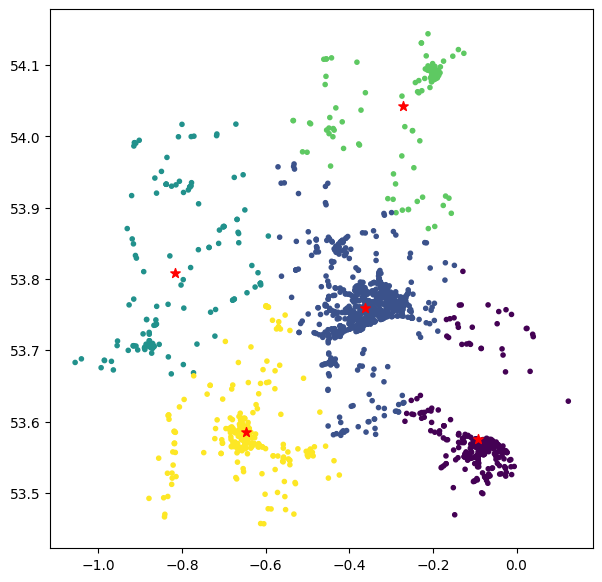

In [226]:
# To create a scatter plot of data points along with cluster centroids 
fig = plt.figure(figsize = (7, 7))
plt.scatter(Lat_Long_df['longitude'], Lat_Long_df['latitude'], c = Labels, cmap = 'viridis', marker = '.')
plt.scatter(Centroids[:,1], Centroids[:,0], marker = '*', color = 'red', s=50)

plt.show()

In [133]:
# Create a Folium map instance
the_map = folium.Map(location=[53.744936, -0.393424], zoom_start=10)

# Iterate through the first 5 clusters
for cluster_num in range(5):
    cluster_points_lat = Lat_Long_df[Labels == cluster_num]['latitude']
    cluster_points_lon = Lat_Long_df[Labels == cluster_num]['longitude']
    color = next(cluster_colors)
    
    # Create CircleMarkers for each point in the cluster
    for lat, lon in zip(cluster_points_lat, cluster_points_lon):
        folium.CircleMarker(
            location=[lat, lon], 
            radius=2, 
            color=color, 
            fill=True, 
            fill_color=color, 
            fill_opacity=0.6
        ).add_to(the_map)

# Add the centroids to the map
for lat, lon in zip(Centroids[:, 1], Centroids[:, 0]):
    folium.Marker([lat, lon], icon=folium.Icon(color='green', icon='star')).add_to(the_map)

# Show the map
the_map.save('cluster_map_5_clusters.html')  # Save the map as an HTML file


In [134]:
the_map

The figure above depicts the map of Humberside and that there are cities that are high brow for accidents occurrence. scurnthorpe in North Linconshire, Grimsby in North East Linconshire, Kingston upon hull, hessle, Goole and Bridlington are urban areas with a high density of accidents.

In [227]:
# What inertia do you get for n_clusters=5?
kmeans.inertia_

7161.943172582477

A high inertia_ value typically indicates that the data points are farther apart to the centroids of their respective clusters, suggesting that the clusters are not tightly packed.

In [136]:
N_clusters = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Lat_Long_df)
    N_clusters.append(kmeans.inertia_)
N_clusters

C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The 

[113.27134603119096,
 58.09529125956371,
 30.257373642914786,
 21.518076924980853,
 14.80312303320651,
 12.360424748533209,
 10.447597113545557,
 8.901663781025844,
 7.976687836906785,
 6.94887060512886,
 6.243685126567667,
 5.671514084183403,
 5.07245916369235,
 4.548712173766496,
 4.04944016154581,
 3.794877628536393,
 3.3831275382610513,
 3.1336332626473538,
 3.025417698919795]

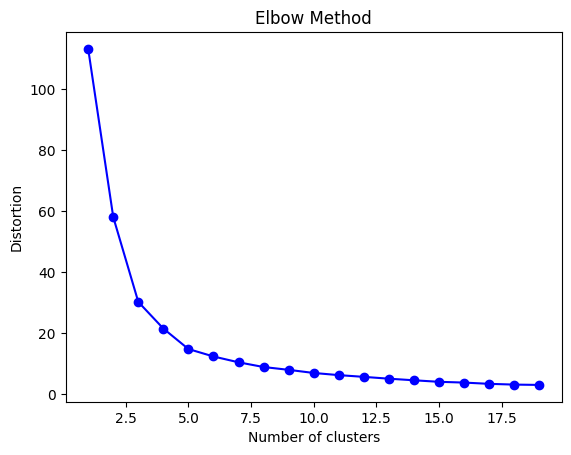

In [137]:
plt.figure()
plt.plot(range(1,20), N_clusters, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [138]:
Speed_Lim_Weather_df = Accid_Lsoa_df[['speed_limit', 'weather_conditions']]
Speed_Lim_Weather_df

speed_limit  weather_conditions
0              30                   1
1              30                   1
2              30                   1
3              30                   1
4              30                   1
...           ...                 ...
1658           30                   1
1659           20                   1
1660           30                   1
1661           30                   1
1662           30                   1

[1663 rows x 2 columns]

In [139]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Speed_Lim_Weather_df)
kmeans.fit(Speed_Lim_Weather_df)

C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [140]:
labels = kmeans.predict(Speed_Lim_Weather_df)
centroids = kmeans.cluster_centers_

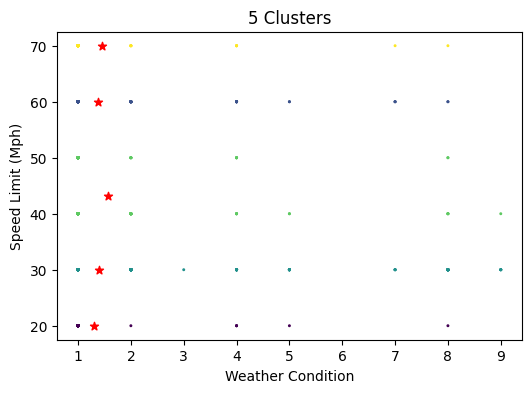

In [141]:
fig = plt.figure(figsize = (6,4))
plt.scatter(x=Speed_Lim_Weather_df['weather_conditions'], y= Speed_Lim_Weather_df['speed_limit'], c = labels, cmap = 'viridis', marker = '.', s=5)
plt.scatter(centroids[:,1], centroids[:,0], marker = '*', color = 'r')

plt.title("5 Clusters")
plt.xlabel("Weather Condition")
plt.ylabel("Speed Limit (Mph)")
plt.show()

The graph above shows the weather conditions where speed limit is clustered. This means that there were more accidents when the weather condition was 1 (fine without high winds) and with speed limit between 30 to 70. 

In [142]:
# weather condition and speed limit that generate road traffic accident
Speed_Lim_Weather_df = Accident_df.groupby(['weather_conditions', 'speed_limit'])[['accident_index']].count().reindex().rename(columns={'accident_index':'count'}).sort_values(by='count', ascending=False)
Speed_Lim_Weather_df

count
weather_conditions speed_limit       
 1                  30          41052
                    60           8752
                    20           8570
 2                  30           6357
 1                  40           6118
                    70           3331
                    50           2899
 9                  30           1587
 2                  60           1462
 8                  30           1455
 2                  20           1362
                    40           1066
                    70            833
 4                  30            764
 5                  30            752
 8                  20            524
 2                  50            500
 9                  20            402
 5                  60            288
 8                  60            277
 5                  70            232
 4                  60            223
 8                  40            211
 7                  30            193
 9                  60            169
 7                  60            155
 9                  40            151
 5                  20            148
                    40            146
 4                  20            134
                    40            111
 5                  50             99
 8                  50             99
 4                  70             96
 3                  30             78
 4                  50             73
 8                  70             63
 9                  50             63
 3                  60             54
 9                  70             50
 7                  40             49
                    70             42
                    50             39
                    20             31
 6                  60             27
 3                  70             27
 6                  30             22
                    70             13
 3                  40             11
                    20              9
 1                 -1               7
 3                  50              6
 6                  50              4
                    40              4
                    20              3
 2                 -1               3
 7                 -1               1
 9                 -1               1
-1                  60              1

This shows that the highest number of accidents occurs under weather condition waas 1 which denotes that the weather is fine without high winds with speed limit 30 and 60 having a total count of 41,052 and 8752 accidents respectively

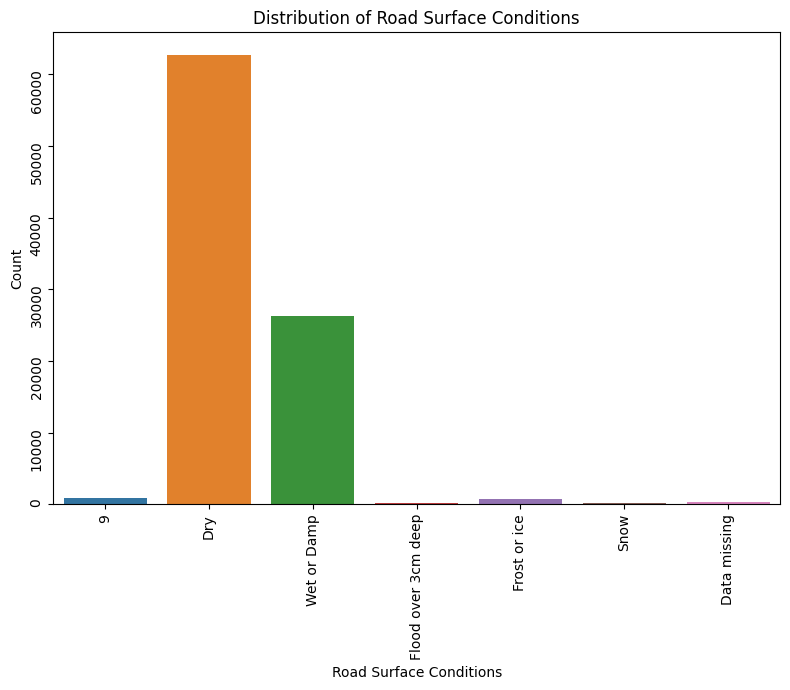

In [143]:
# Road Surface Distribution

road_surf =Accident_df.copy()
road_surf['road_surface_conditions'].replace({-1:'Data missing', 1:'Dry', 2:'Wet or Damp', 3:'Snow', 4:'Frost or ice', 5:'Flood over 3cm deep', 6:'Oil or diesel', 7:'Mud'}, inplace = True)

fig, ax = plt.subplots(figsize=(8, 7))
ax.tick_params(labelrotation=90)

# Use Seaborn's countplot to create the bar plot
sns.countplot(data=road_surf, x='road_surface_conditions', ax=ax)
ax.set_title('Distribution of Road Surface Conditions')
ax.set_xlabel('Road Surface Conditions')
ax.set_ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()


it can be seen that most of the accidents occurs on a dry surface

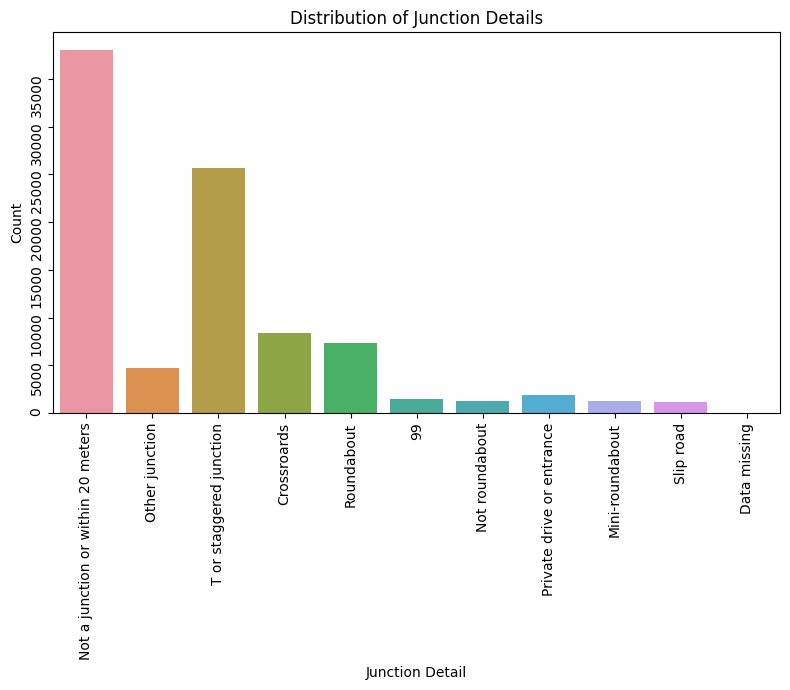

In [144]:
# # PLot of Junction Details
junction =Accident_df.copy()
junction['junction_detail'].replace({-1: 'Data missing', 0: 'Not a junction or within 20 meters', 1: 'Roundabout', 2:'Mini-roundabout', 3: 'T or staggered junction', 5: 'Slip road', 6: 'Crossroards', 7: 'Not roundabout', 8: 'Private drive or entrance', 9: 'Other junction'}, inplace = True)



fig, ax = plt.subplots(figsize=(8, 7))
ax.tick_params(labelrotation=90)

# Using Seaborn's countplot to create the bar plot
sns.countplot(data=junction, x='junction_detail', ax=ax)
ax.set_title('Distribution of Junction Details')
ax.set_xlabel('Junction Detail')
ax.set_ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

The above shows that the places where accidents occur mostly **is not a Junction or within 20 meters**

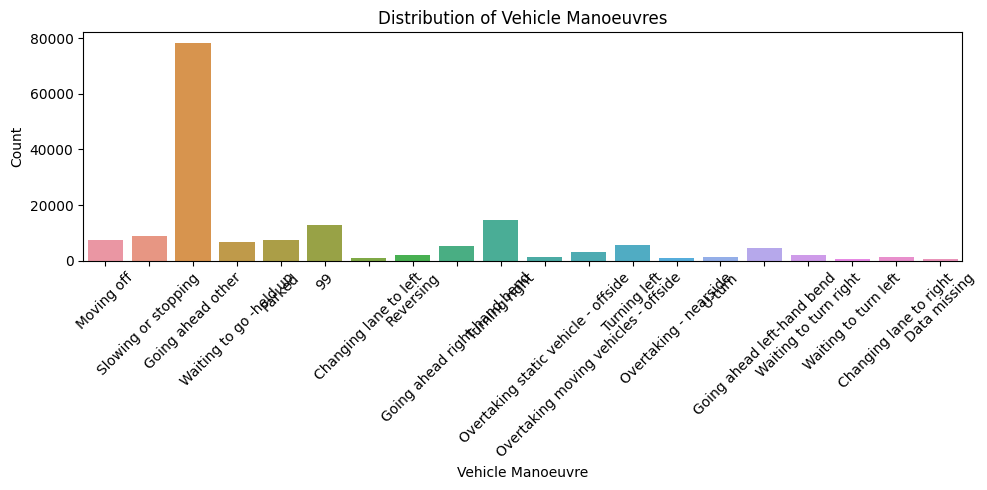

In [145]:
veh_manoeuvre =Vehicle_df.copy()
veh_manoeuvre['vehicle_manoeuvre'].replace({-1:'Data missing', 1: 'Reversing', 2: 'Parked', 3: 'Waiting to go -held up', 4: 'Slowing or stopping', 5: 'Moving off', 6: 'U-turn', 7: 'Turning left', 8: 'Waiting to turn left', 9: 'Turning right', 10: 'Waiting to turn right', 11: 'Changing lane to left', 12: 'Changing lane to right', 13: 'Overtaking moving vehicles - offside', 14: 'Overtaking static vehicle - offside', 15: 'Overtaking - nearside', 16: 'Going ahead left-hand bend', 17: 'Going ahead right-hand bend', 18: 'Going ahead other'}, inplace = True)

fig, ax = plt.subplots(figsize=(10, 5))

# Using Seaborn's countplot to create the bar plot
sns.countplot(data=veh_manoeuvre, x='vehicle_manoeuvre', ax=ax)
ax.set_title('Distribution of Vehicle Manoeuvres')
ax.set_xlabel('Vehicle Manoeuvre')
ax.set_ylabel('Count')

# Rotate x-axis labels for better visibility if needed
ax.tick_params(axis='x', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

The graph above shows that vehicles **slowing or stopping** have the highest number road accidents.

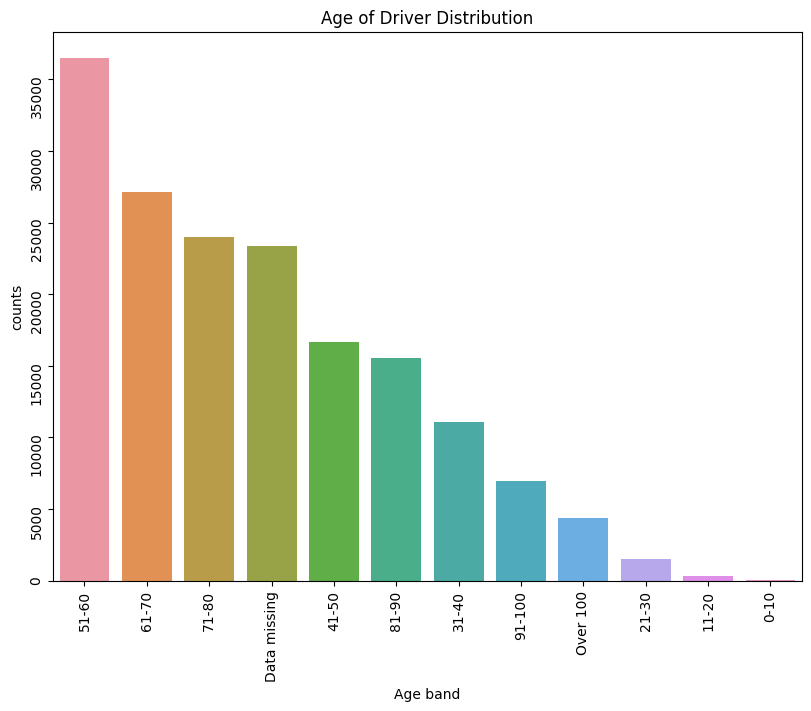

51-60           36494
61-70           27108
71-80           24008
Data missing    23344
41-50           16695
81-90           15562
31-40           11046
91-100           6941
Over 100         4343
21-30            1499
11-20             301
0-10               34
Name: Age_band, dtype: int64

In [146]:
# Drivers_Age
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8,7))
Vehicle_df['Age_band'] = Vehicle_df['age_band_of_driver'].map({1: '0-10', 2: '11-20', 3: '21-30', 4: '31-40', 5: '41-50', 6: '51-60', 7: '61-70', 8: '71-80', 9: '81-90', 10: '91-100', 11: 'Over 100', -1: 'Data missing'}) 
Drivers_Age = Vehicle_df['Age_band'].value_counts()

sns.barplot(ax=axs, x = Drivers_Age.index, y = Drivers_Age)
axs.set_title("Age of Driver Distribution")
axs.tick_params(labelrotation=90)
plt.xlabel('Age band')
plt.ylabel('counts')
plt.show()
Drivers_Age

The above shows that the age range of drivers that is mostly involve in road traffic accidents is between 51-60 years of age

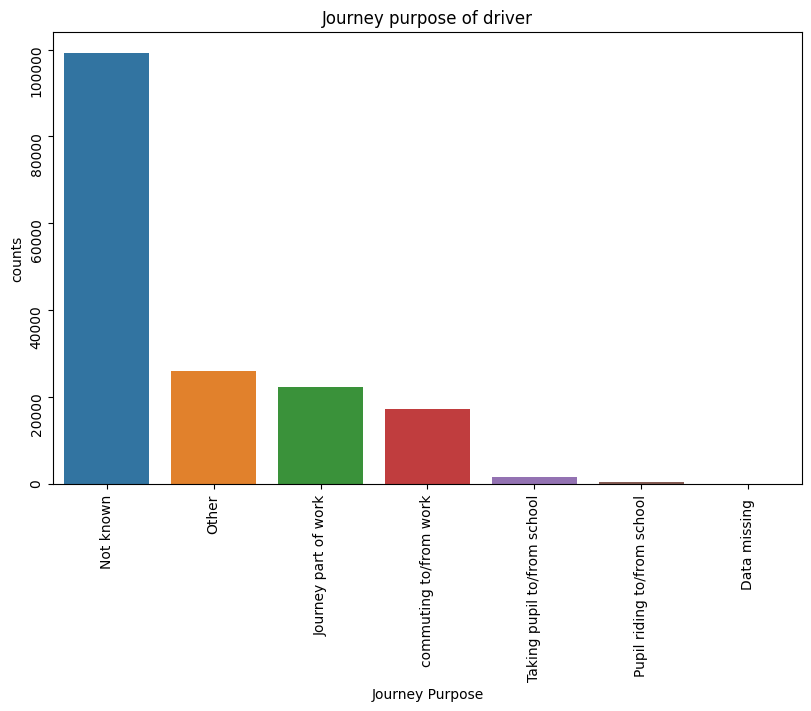

Not known                      99151
Other                          26104
Journey part of work           22408
commuting to/from work         17309
Taking pupil to/from school     1625
Pupil riding to/from school      594
Data missing                     184
Name: Journey_Purpose_of_Driver, dtype: int64

In [147]:
# Journey Purpose of driver
Vehicle_df['Journey_Purpose_of_Driver'] = Vehicle_df['journey_purpose_of_driver'].map({1: 'Journey part of work', 2: 'commuting to/from work', 3: 'Taking pupil to/from school', 4: 'Pupil riding to/from school', 5: 'Other', 6:'Not known', 15:'Other/Not known', -1: 'Data missing '})
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8,7))
journey_purpose = Vehicle_df['Journey_Purpose_of_Driver'].value_counts()

sns.barplot(ax=axs, x = journey_purpose.index, y = journey_purpose)
axs.set_title("Journey purpose of driver")
axs.tick_params(labelrotation=90)
plt.xlabel('Journey Purpose')
plt.ylabel('counts')
plt.show()
journey_purpose

The above graph shows that most **journey purpose** of drivers involved in accidents were **unknown**.

### Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 

In [148]:
# To retrieve the attributes of the Vehicle dataframe
Vehicle_df.columns

Index(['vehicle_index', 'accident_index', 'accident_year',
       'accident_reference', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'Age_band', 'Journey_Purpose_of_Driver'],
      dtype='object')

In [149]:
# Define the columns you want to analyze for outliers
columns_to_analyze = ['number_of_casualties', 'speed_limit', 'weather_conditions', 'road_surface_conditions']

# Calculate Z-scores for outlier detection
z_scores = np.abs((Accident_df[columns_to_analyze] - Accident_df[columns_to_analyze].mean()) / Accident_df[columns_to_analyze].std())

# Define a threshold for Z-score outlier detection (adjust as needed)
z_score_threshold = 2.5

# Identify outliers using Z-scores


In [150]:
# Select numeric columns for analysis (excluding non-numeric columns)
numeric_columns = Vehicle_df.select_dtypes(include=['number']).columns

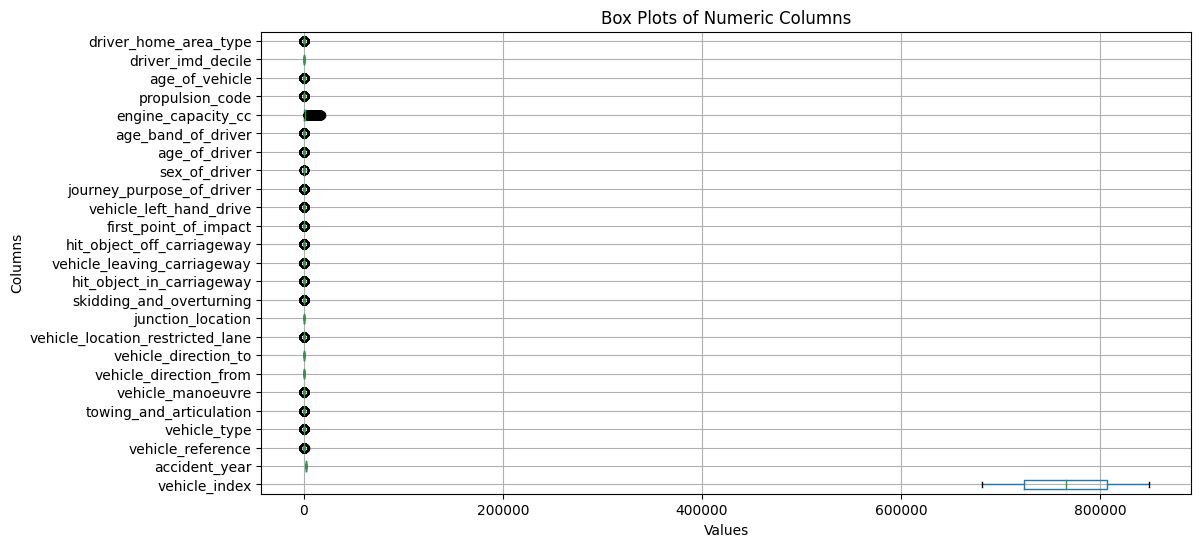

In [151]:
# Create box plots for numeric columns
plt.figure(figsize=(12, 6))
Vehicle_df[numeric_columns].boxplot(vert=False)
plt.title("Box Plots of Numeric Columns")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

In [152]:
#Calculate IQR for each numeric column
Q1 = Vehicle_df[numeric_columns].quantile(0.25)
Q3 = Vehicle_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [153]:
# Identify potential outliers using the IQR method
outliers = ((Vehicle_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (Vehicle_df[numeric_columns] > (Q3 + 1.5 * IQR)))


In [154]:
# Display columns with potential outliers
columns_with_outliers = outliers.sum().any()
print("Columns with potential outliers:")
print(columns_with_outliers[columns_with_outliers])

Columns with potential outliers:
[ True]


In [155]:
# To view the ages of the driver
age_of_driver = Vehicle_df['age_of_driver']
age_of_driver

0         32
1         45
2         -1
3         44
4         20
          ..
167370    57
167371    38
167372    68
167373    76
167374    39
Name: age_of_driver, Length: 167375, dtype: int64

In [156]:
Vehicle_df[Vehicle_df.age_of_driver < 0]

vehicle_index accident_index  accident_year accident_reference  \
2              681718  2020010228005           2020          010228005   
11             681727  2020010228018           2020          010228018   
14             681730  2020010228022           2020          010228022   
19             681735  2020010228031           2020          010228031   
21             681737  2020010228032           2020          010228032   
...               ...            ...            ...                ...   
167258         848974  2020991010956           2020          991010956   
167302         849018  2020991012311           2020          991012311   
167340         849056  2020991016099           2020          991016099   
167341         849057  2020991016099           2020          991016099   
167342         849058  2020991016099           2020          991016099   

        vehicle_reference  vehicle_type  towing_and_articulation  \
2                       1             9                        0   
11                      2             9                        0   
14                      1             9                        0   
19                      2             9                        9   
21                      2             9                        0   
...                   ...           ...                      ...   
167258                  2            19                        0   
167302                  2            19                        0   
167340                  2             9                        0   
167341                  3             9                        0   
167342                  4             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
2                      18                      -1                    -1   
11                      2                       0                     0   
14                     18                       7                     3   
19                     99                       9                     9   
21                      2                       0                     0   
...                   ...                     ...                   ...   
167258                  2                       0                     0   
167302                  2                       0                     0   
167340                  2                       0                     0   
167341                  2                       0                     0   
167342                  2                       0                     0   

        vehicle_location_restricted_lane  junction_location  \
2                                      0                  0   
11                                     0                  2   
14                                     9                  1   
19                                    99                  0   
21                                     0                  0   
...                                  ...                ...   
167258                                 0                  0   
167302                                 0                  1   
167340                                 0                  0   
167341                                 0                  0   
167342                                 0                  0   

        skidding_and_overturning  hit_object_in_carriageway  \
2                              0                          0   
11                             0                          0   
14                             0                         11   
19                             9                         99   
21                             0                          0   
...                          ...                        ...   
167258                         0                          0   
167302                         0                          0   
167340                         0                          0   
167341        

In [157]:
# To check the ages of driver less than 0. note that age can not be a negative value
(Vehicle_df['age_of_driver']<0).sum()

23344

<Axes: xlabel='age_of_driver', ylabel='Count'>

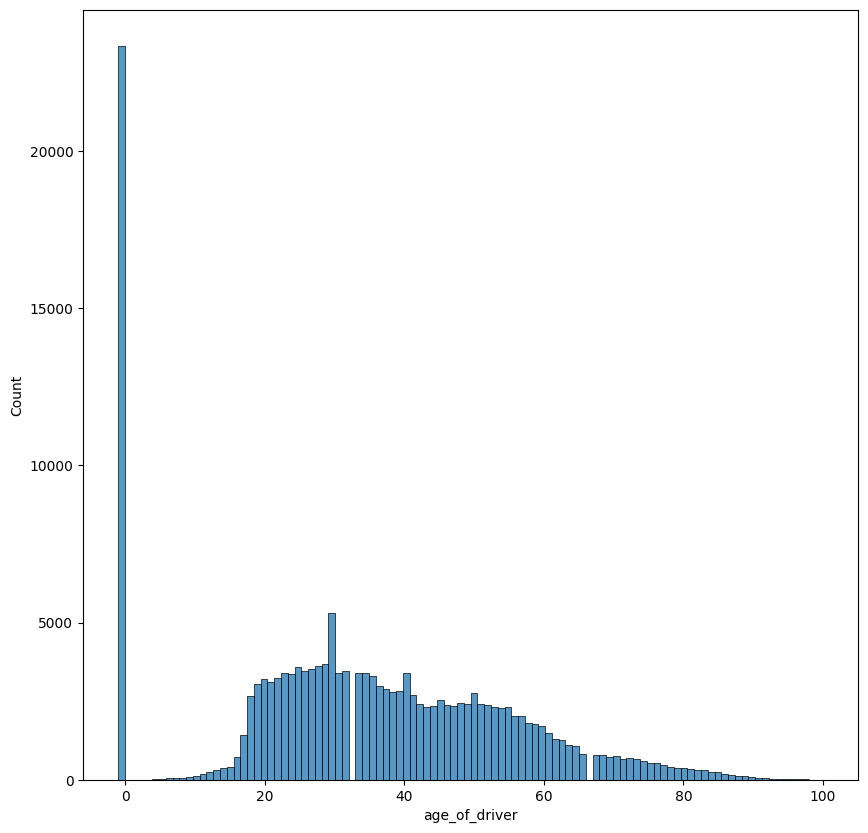

In [158]:
# plot of the age of driver
plt.figure(figsize=(10,10))
sns.histplot(Vehicle_df.age_of_driver)

In [159]:
# To view the ages of the vehicle
age_of_vehicle =Vehicle_df['age_of_vehicle']
age_of_vehicle

0         6
1         2
2        -1
3         8
4         4
         ..
167370    2
167371    2
167372    1
167373   -1
167374    2
Name: age_of_vehicle, Length: 167375, dtype: int64

In [160]:
Vehicle_df[Vehicle_df.age_of_vehicle < 0]

vehicle_index accident_index  accident_year accident_reference  \
2              681718  2020010228005           2020          010228005   
10             681726  2020010228018           2020          010228018   
14             681730  2020010228022           2020          010228022   
32             681748  2020010228077           2020          010228077   
33             681749  2020010228086           2020          010228086   
...               ...            ...            ...                ...   
167362         849078  2020991024039           2020          991024039   
167366         849082  2020991024526           2020          991024526   
167367         849083  2020991027064           2020          991027064   
167368         849084  2020991027064           2020          991027064   
167373         849089  2020991030900           2020          991030900   

        vehicle_reference  vehicle_type  towing_and_articulation  \
2                       1             9                        0   
10                      1             9                        0   
14                      1             9                        0   
32                      2             2                        0   
33                      1             3                        0   
...                   ...           ...                      ...   
167362                  1             9                        0   
167366                  1            98                        0   
167367                  1             9                        0   
167368                  2             1                        0   
167373                  2             1                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
2                      18                      -1                    -1   
10                     18                       1                     5   
14                     18                       7                     3   
32                     18                       8                     4   
33                     18                       7                     3   
...                   ...                     ...                   ...   
167362                  1                       2                     6   
167366                 18                       6                     2   
167367                 16                       3                     7   
167368                  5                       1                     5   
167373                 18                       6                     2   

        vehicle_location_restricted_lane  junction_location  \
2                                      0                  0   
10                                     0                  2   
14                                     9                  1   
32                                     9                  6   
33                                     9                  0   
...                                  ...                ...   
167362                                 0                  0   
167366                                 0                  0   
167367                                 0                  3   
167368                                 0                  6   
167373                                 4                  8   

        skidding_and_overturning  hit_object_in_carriageway  \
2                              0                          0   
10                             0                          4   
14                             0                         11   
32                             5                          4   
33                             0                         11   
...                          ...                        ...   
167362                         0                          4   
167366                         0                         12   
167367                         0                          0   
167368        

In [161]:
# To check the ages of the vehicle less than 0. note that age can not be a negative value
(Vehicle_df['age_of_vehicle']<0).sum()

43072

<Axes: xlabel='age_of_vehicle', ylabel='Count'>

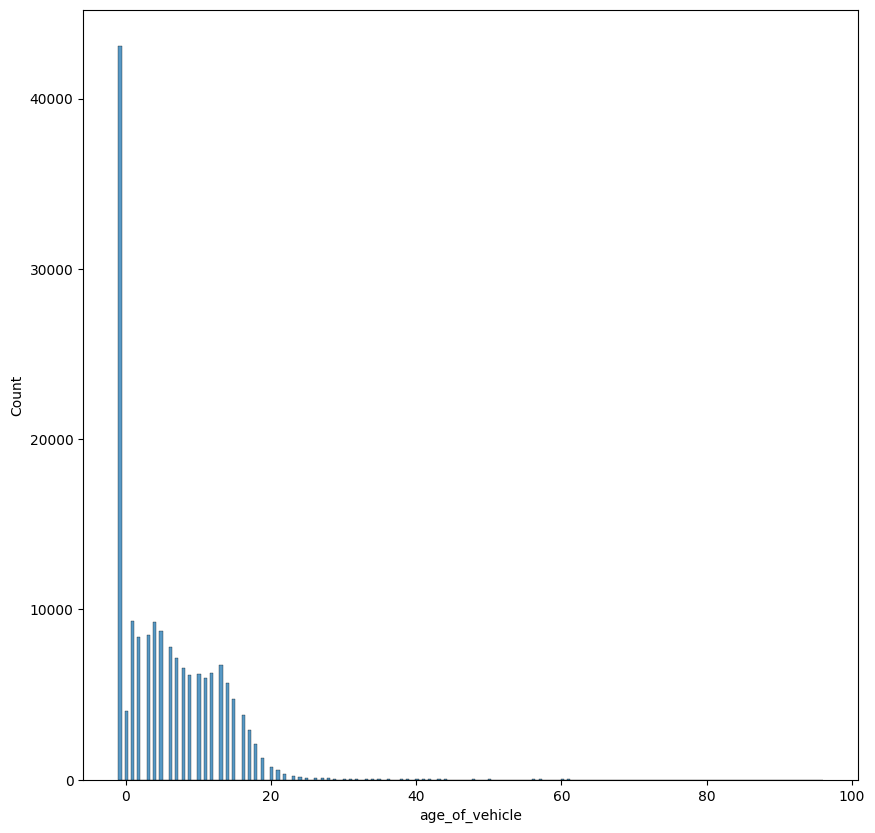

In [162]:
# plot of the age of the vehicle
plt.figure(figsize=(10,10))
sns.histplot(Vehicle_df.age_of_vehicle)

###  Multiple of Interquartile Range(IQR) method

In [163]:
q75, q25 = np.percentile(age_of_driver, [75,25])
iqr = q75 - q25
lower_quartile, upper_quartile = q25 - 1.5 * iqr, q75 + 1.5 * iqr
print(f'The Interquartile Range for Age of Driver is {iqr}\n')
print(f'Lower quartile for Age of Driver is {lower_quartile}')
print(f'Upper quartile is for Age of Driver {upper_quartile}')

The Interquartile Range for Age of Driver is 27.0

Lower quartile for Age of Driver is -18.5
Upper quartile is for Age of Driver 89.5


In [164]:
q75, q25 = np.percentile(age_of_vehicle, [75,25])
iqr = q75 - q25
lower_quartile, upper_quartile = q25 - 1.5 * iqr, q75 + 1.5 * iqr
print(f'The Interquartile Range for Age of Vehicle is {iqr}\n')
print(f'Lower quartile for Age of Vehicle is {lower_quartile}')
print(f'Upper quartile is for Age of Vehicle {upper_quartile}')

The Interquartile Range for Age of Vehicle is 12.0

Lower quartile for Age of Vehicle is -19.0
Upper quartile is for Age of Vehicle 29.0


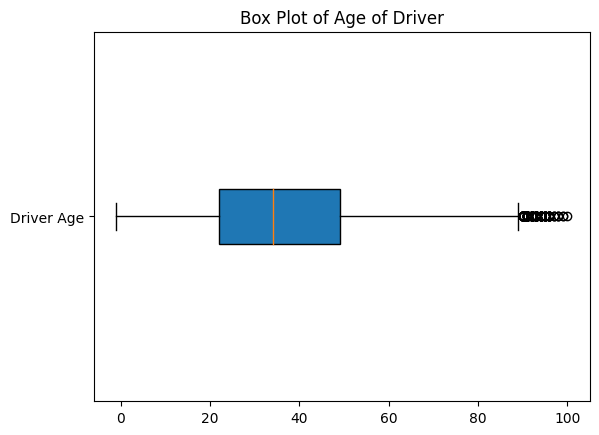

In [165]:
plt.boxplot(age_of_driver, vert=False, patch_artist=True, labels=["Driver Age"])
plt.title("Box Plot of Age of Driver")
plt.show()

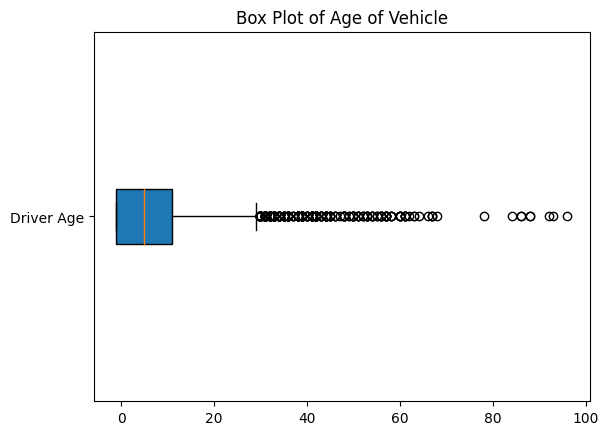

In [228]:
plt.boxplot(age_of_vehicle, vert=False, patch_artist=True, labels=["Driver Age"])
plt.title("Box Plot of Age of Vehicle")
plt.show()

#### using the Grubb's Test

In [167]:
#function for grubbs test for age of the driver
def get_grubbs(a):
    #Compute the mean
    avg = np.mean(a)
    
    #Compute the absolute value of x(i)-avg(x)
    absvalues = abs(a-avg)
    
    #Obtain the maximum value of the absvalues
    maxvalue = max(absvalues)
    
    #Compute the G value from the above, and from the std deviation
    stdev = np.std(a)
    grubbs = maxvalue/stdev
    
    print(f"The average age of driver is {avg}")
    print(f"The absolute value is {absvalues}")
    print(f"The maximum age of the driver is {maxvalue}")
    print(f"The Grubbs' Test is {grubbs}")

#### To compute the critical value of G needed to accept or reject null hypothesis (H0) that there are no outliers or accept he alternate hypothesis(HA) that there are outliers

In [168]:
def get_critical_G(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    
    critical_value = numerator / denominator
    
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

#### The Grubbs' Test for Age of Driver

In [169]:
get_grubbs(Vehicle_df.age_of_driver)

The average age of driver is 34.50965795369679
The absolute value is 0          2.509658
1         10.490342
2         35.509658
3          9.490342
4         14.509658
            ...    
167370    22.490342
167371     3.490342
167372    33.490342
167373    41.490342
167374     4.490342
Name: age_of_driver, Length: 167375, dtype: float64
The maximum age of the driver is 65.49034204630321
The Grubbs' Test is 3.14895940018594


In [170]:
# Determining the critical parameter for age of the data
GrubbsCritical = get_critical_G(len(age_of_driver), 0.05)

Grubbs Critical Value: 5.124052908584172


#### Accept/ reject the HO/HA for age of the driver

In [171]:
#function for grubbs test for age of the vehicle
def get_grubbs(a):
    #Compute the mean
    avg = np.mean(a)
    
    #Compute the absolute value of x(i)-avg(x)
    absvalues = abs(a-avg)
    
    #Obtain the maximum value of the absvalues
    maxvalue = max(absvalues)
    
    #Compute the G value from the above, and from the std deviation
    stdev = np.std(a)
    grubbs = maxvalue/stdev
    
    print(f"The average age of vehicle is {avg}")
    print(f"The absolute value is {absvalues}")
    print(f"The maximum age of the vehicle is {maxvalue}")
    print(f"The Grubbs' Test is {grubbs}")

#### To compute the critical value2 of G needed to accept or reject null hypothesis (H0) that there are no outliers or accept the alternate hypothesis(HA) that there are outliers

In [172]:
def get_critical_G2(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    
    critical_value = numerator / denominator
    
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

#### Grubbs test for age of vehicle

In [173]:
get_grubbs(Vehicle_df.age_of_vehicle)

The average age of vehicle is 5.820600448095593
The absolute value is 0         0.1794
1         3.8206
2         6.8206
3         2.1794
4         1.8206
           ...  
167370    3.8206
167371    3.8206
167372    4.8206
167373    6.8206
167374    3.8206
Name: age_of_vehicle, Length: 167375, dtype: float64
The maximum age of the vehicle is 90.17939955190441
The Grubbs' Test is 14.242053069432727


In [174]:
# Determining the critical parameter for age of the data
GrubbsCritical2 = get_critical_G2(len(age_of_vehicle), 0.05)

Grubbs Critical Value: 5.124052908584172


#### Accept/ reject the HO/HA for age of the vehicle

### Modelling

In [175]:
Accident_df['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

In [176]:
# merging the Vehicle and Casualty df  and later merging with the Accident data
Veh_Cas = pd.merge(Vehicle_df, Casualty_df, on=['accident_index', 'vehicle_reference'], how='inner')
Acci_Veh_Cas_Merged = pd.merge(Accident_df, Veh_Cas, on=['accident_index'], how='inner')
len(Acci_Veh_Cas_Merged) == len(Casualty_df)

True

In [177]:
Acci_Veh_Cas_Merged

accident_index  accident_year accident_reference  \
0       2020010219808           2020          010219808   
1       2020010220496           2020          010220496   
2       2020010220496           2020          010220496   
3       2020010228005           2020          010228005   
4       2020010228006           2020          010228006   
...               ...            ...                ...   
115579  2020991027064           2020          991027064   
115580  2020991029573           2020          991029573   
115581  2020991030297           2020          991030297   
115582  2020991030900           2020          991030900   
115583  2020991032575           2020          991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    529337.0                176237.0  -0.139253  51.470327   
3                    526432.0                182761.0  -0.178719  51.529614   
4                    538676.0                184371.0  -0.001683  51.541210   
...                       ...                     ...        ...        ...   
115579               343034.0                731654.0  -2.926320  56.473539   
115580               257963.0                658891.0  -4.267565  55.802353   
115581               383664.0                810646.0  -2.271903  57.186317   
115582               277161.0                674852.0  -3.968753  55.950940   
115583               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  \
0                  1                  3                   1   
1                  1                  3                   1   
2                  1                  3                   1   
3                  1                  3                   1   
4                  1                  2                   1   
...              ...                ...                 ...   
115579            99                  2                   2   
115580            99                  3                   1   
115581            99                  2                   2   
115582            99                  3                   2   
115583            99                  3                   1   

        number_of_casualties  day_of_week                Time  \
0                          1            3 2020-04-02 09:00:00   
1                          2            2 2020-04-27 13:55:00   
2                          2            2 2020-04-27 13:55:00   
3                          1            4 2020-01-01 01:25:00   
4                          1            4 2020-01-01 01:50:00   
...                      ...          ...                 ...   
115579                     1            4 2020-12-08 14:30:00   
115580                     1            6 2020-11-13 15:05:00   
115581                     1            4 2020-04-15 12:42:00   
115582                     1            3 2020-12-15 14:00:00   
115583                     1            3 2020-08-25 13:50:00   

        local_authority_district local_authority_ons_district  \
0                             10                    E09000032   
1                              9                    E09000022   
2                              9                    E09000022   
3                              1                    E09000033   
4                             17                    E09000025   
...                          ...                          ...   
115579                       918                    S12000042   
115580                       922                    S12000011   
115581                       910                    S12000033   
115582                       932                    S12000044   
115583                       916                    S12000039   

       local_authority_highway

In [178]:
# To check for duplicated 
Acci_Veh_Cas_Merged.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
115579    False
115580    False
115581    False
115582    False
115583    False
Length: 115584, dtype: bool

In [179]:
Acci_Veh_Cas_Merged['casualty_severity'].replace({3:0, 2:0}, inplace = True)

In [180]:
Non_fatal = (Acci_Veh_Cas_Merged['accident_severity'] != 1)

In [181]:
Non_fatal

0         True
1         True
2         True
3         True
4         True
          ... 
115579    True
115580    True
115581    True
115582    True
115583    True
Name: accident_severity, Length: 115584, dtype: bool

In [182]:
fatal = (Acci_Veh_Cas_Merged['accident_severity'] == 1)

In [183]:
fatal

0         False
1         False
2         False
3         False
4         False
          ...  
115579    False
115580    False
115581    False
115582    False
115583    False
Name: accident_severity, Length: 115584, dtype: bool

In [184]:
counts = fatal.value_counts()
counts

False    113409
True       2175
Name: accident_severity, dtype: int64

There are 113,409 non fatal accidents and 2,175 fatal accidents. this data is not balanced so we will balance it using the imbalanced-learn package and importing the RandomUnderSampler from imblearn. 

In [185]:
Acci_Veh_Cas_balanced, y_balanced = RandomUnderSampler().fit_resample(Acci_Veh_Cas_Merged, Non_fatal )

In [186]:
# To count the number of True and false values in the new labels (Balanced data)
counts_bal =y_balanced.value_counts()
counts_bal

False    2175
True     2175
Name: accident_severity, dtype: int64

In [187]:
# removing the columns that we will be predicting and other unwanted columns
Attributes_to_drop = ['accident_severity', 'did_police_officer_attend_scene_of_accident']

# To check if the attributes exists in the Dataframe
if set (Attributes_to_drop).issubset(Acci_Veh_Cas_balanced.columns):
    Acci_Veh_Cas_balanced = Acci_Veh_Cas_balanced.drop(Attributes_to_drop, axis=1)

In [188]:
# To remove the non numeric dtype columns() in the dataframe
Acci_Veh_Cas_balanced_Numeric = Acci_Veh_Cas_balanced.select_dtypes([np.number])
Acci_Veh_Cas_balanced_Numeric

accident_year  location_easting_osgr  location_northing_osgr  \
21               2020               553007.0                190580.0   
94               2020               509181.0                172567.0   
103              2020               509650.0                184487.0   
369              2020               534071.0                176697.0   
614              2020               527080.0                176147.0   
...               ...                    ...                     ...   
84308            2020               442516.0                111929.0   
33344            2020               392199.0                403195.0   
94225            2020               523815.0                118202.0   
84534            2020               440618.0                113277.0   
100207           2020               292386.0                 68689.0   

        longitude   latitude  police_force  number_of_vehicles  \
21       0.207510  51.593297             1                   1   
94      -0.430454  51.441583             1                   1   
103     -0.420010  51.548632             1                   2   
369     -0.070962  51.473359             1                   1   
614     -0.171763  51.470029             1                   2   
...           ...        ...           ...                 ...   
84308   -1.396704  50.905266            44                   1   
33344   -2.119139  53.525376             6                   2   
94225   -0.238724  50.949959            47                   2   
84534   -1.423547  50.917523            44                   1   
100207  -3.518997  50.508062            50                   2   

        number_of_casualties  day_of_week  local_authority_district  \
21                         1            4                        15   
94                         1            5                        25   
103                        1            6                        26   
369                        1            4                         8   
614                        1            7                        10   
...                      ...          ...                       ...   
84308                      1            6                       500   
33344                      2            2                       104   
94225                      1            5                       562   
84534                      1            6                       500   
100207                     3            5                       587   

        first_road_class  first_road_number  road_type  speed_limit  \
21                     3                 12          3           50   
94                     5                  0          6           40   
103                    3                 40          3           60   
369                    3                202          6           30   
614                    3               3205          3           30   
...                  ...                ...        ...          ...   
84308                  6                  0          6           30   
33344                  3               6104          6           30   
94225                  4               2116          6           40   
84534                  6                  0          6           30   
100207                 3                379          6           40   

        junction_detail  junction_control  second_road_class  \
21                    0                -1                  0   
94                    0                -1                  0   
103                   0                -1                  0   
369                   3                 2                  6   
614                   6                 2                  5   
...                 ...               ...                ...   
84308                 0                -1                  0   
33344                 3                 4                  4   
94225                 3                 4                  6   
8453

In [189]:
# to check if all dtypes in the dataframe are numeric columns
Acci_Veh_Cas_balanced_Numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4350 entries, 21 to 100207
Data columns (total 68 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_year                            4350 non-null   int64  
 1   location_easting_osgr                    4350 non-null   float64
 2   location_northing_osgr                   4350 non-null   float64
 3   longitude                                4350 non-null   float64
 4   latitude                                 4350 non-null   float64
 5   police_force                             4350 non-null   int64  
 6   number_of_vehicles                       4350 non-null   int64  
 7   number_of_casualties                     4350 non-null   int64  
 8   day_of_week                              4350 non-null   int64  
 9   local_authority_district                 4350 non-null   int64  
 10  first_road_class                         4350

In [190]:
Acci_Veh_Cas_balanced = Acci_Veh_Cas_balanced.drop(['accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'first_road_number', 'second_road_number', 'accident_reference', 'local_authority_district', 'police_force'], axis = 1)


In [191]:
# Object generartion to select features
y_balanced

21        False
94        False
103       False
369       False
614       False
          ...  
84308      True
33344      True
94225      True
84534      True
100207     True
Name: accident_severity, Length: 4350, dtype: bool

In [192]:

selector = SelectKBest(f_classif, k= 10)
selector.fit(Acci_Veh_Cas_balanced_Numeric, y_balanced)

C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 28 53] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\760676\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest()

In [193]:
# To check for features that are not useful for analysis 
Acci_Veh_Cas_balanced.columns[Acci_Veh_Cas_balanced.nunique() <= 1]

Index(['accident_year', 'accident_year_x', 'accident_year_y'], dtype='object')

In [194]:
# dropping it
Acci_Veh_Cas_balanced = Acci_Veh_Cas_balanced.drop(columns = ['accident_year', 'accident_year_x', 'accident_year_y'])

#### To get the names and scores of the features it selected

In [195]:
mask = selector.get_support()
mask

array([False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [196]:
names = selector.feature_names_in_[mask]
names

array(['number_of_casualties', 'local_authority_district', 'speed_limit',
       'junction_control', 'second_road_class', 'urban_or_rural_area',
       'vehicle_index', 'vehicle_location_restricted_lane',
       'junction_location', 'casualty_severity'], dtype=object)

In [197]:
scores = selector.scores_[mask]
scores

array([ 190.59197334,  142.37186447,  558.07709949,  250.9887013 ,
        251.72652695,  412.48932263,  140.08272952,  145.65074427,
        183.95085544, 4439.21678322])

#### plotting a bar chart with features and scores

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'number_of_casualties'),
  Text(1, 0, 'local_authority_district'),
  Text(2, 0, 'speed_limit'),
  Text(3, 0, 'junction_control'),
  Text(4, 0, 'second_road_class'),
  Text(5, 0, 'urban_or_rural_area'),
  Text(6, 0, 'vehicle_index'),
  Text(7, 0, 'vehicle_location_restricted_lane'),
  Text(8, 0, 'junction_location'),
  Text(9, 0, 'casualty_severity')])

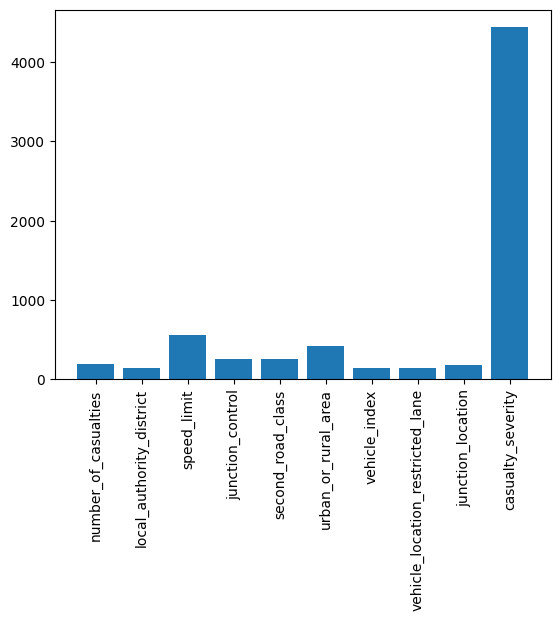

In [198]:
plt.bar(names, scores)
plt.xticks(rotation= 'vertical')

It can be seen that the feature with the best score is the **casualty_severity** and is also the most useful in classifying whether accidents are fatal or not. it can also be seen that the **speed_limit and the settings of the location( whether it is a rural or urban area)** and probably others.

In [199]:
Acci_Veh_Cas_balanced_Numeric_k_best = Acci_Veh_Cas_balanced_Numeric[selector.feature_names_in_[mask]]
Acci_Veh_Cas_balanced_Numeric_k_best.shape, Acci_Veh_Cas_balanced_Numeric_k_best.columns

((4350, 10),
 Index(['number_of_casualties', 'local_authority_district', 'speed_limit',
        'junction_control', 'second_road_class', 'urban_or_rural_area',
        'vehicle_index', 'vehicle_location_restricted_lane',
        'junction_location', 'casualty_severity'],
       dtype='object'))

In [200]:
X_train, X_test, y_train, y_test = train_test_split(Acci_Veh_Cas_balanced_Numeric_k_best, y_balanced, test_size =0.2 , random_state = 68)

In [201]:
tree = DecisionTreeClassifier(min_samples_leaf = 100)

In [202]:
# Using cross validation

tree = DecisionTreeClassifier() 

results_tree = cross_validate(
    tree,
    X_train,
    y_train,
    cv = 10,
    scoring = 'accuracy',
    return_estimator = True
)

In [203]:
# Accuracy for each fold
test_scores = results_tree['test_score']
test_scores

array([0.91666667, 0.9137931 , 0.90229885, 0.89942529, 0.88218391,
       0.89655172, 0.91666667, 0.88218391, 0.90517241, 0.90517241])

In [204]:
# standard deviation of Accuracies
std_dev_accuracy = np.std(results_tree['test_score'])
print(f"The Standard deviation of Accuracy is:{std_dev_accuracy}")

The Standard deviation of Accuracy is:0.011879325637123203


In [205]:
scoring =  {'accuracy' : make_scorer(accuracy_score),
          'precision' : make_scorer(precision_score, average = 'macro'),
           'recall' : make_scorer(recall_score, average = 'macro'),
           'f1' : make_scorer(f1_score, average = 'macro')}

In [206]:
results_tree2 = cross_validate(
    tree,
    X_train,
    y_train,
    cv = 10,
    scoring = scoring,
    return_estimator = True
)

In [207]:
# To print the mean and standard deviation for each scoring metrics
for metric in scoring.keys():
    metric_values = results_tree2[f"test_{metric}"]
    
    print(f"{metric}:\n Values: {metric_values}\n Mean: {np.mean(metric_values)}\n Standard deviation: {np.std(metric_values)}\n")


accuracy:
 Values: [0.91091954 0.91666667 0.90517241 0.90229885 0.87931034 0.89655172
 0.91091954 0.8908046  0.90517241 0.91091954]
 Mean: 0.9028735632183909
 Standard deviation: 0.010659331604018057

precision:
 Values: [0.91120291 0.91961436 0.90525899 0.90352707 0.87970646 0.8967614
 0.91158567 0.89163246 0.90582923 0.91202186]
 Mean: 0.9037140402040096
 Standard deviation: 0.01103380862641492

recall:
 Values: [0.91099917 0.91691164 0.90521883 0.90246078 0.87940545 0.89655172
 0.91091954 0.8908046  0.90517241 0.91091954]
 Mean: 0.9029363687272797
 Standard deviation: 0.010676434695640917

f1:
 Values: [0.91091292 0.91655021 0.90517163 0.90224719 0.8792944  0.89653805
 0.91088348 0.89074686 0.90513403 0.91085992]
 Mean: 0.9028338699167708
 Standard deviation: 0.010646890352000274



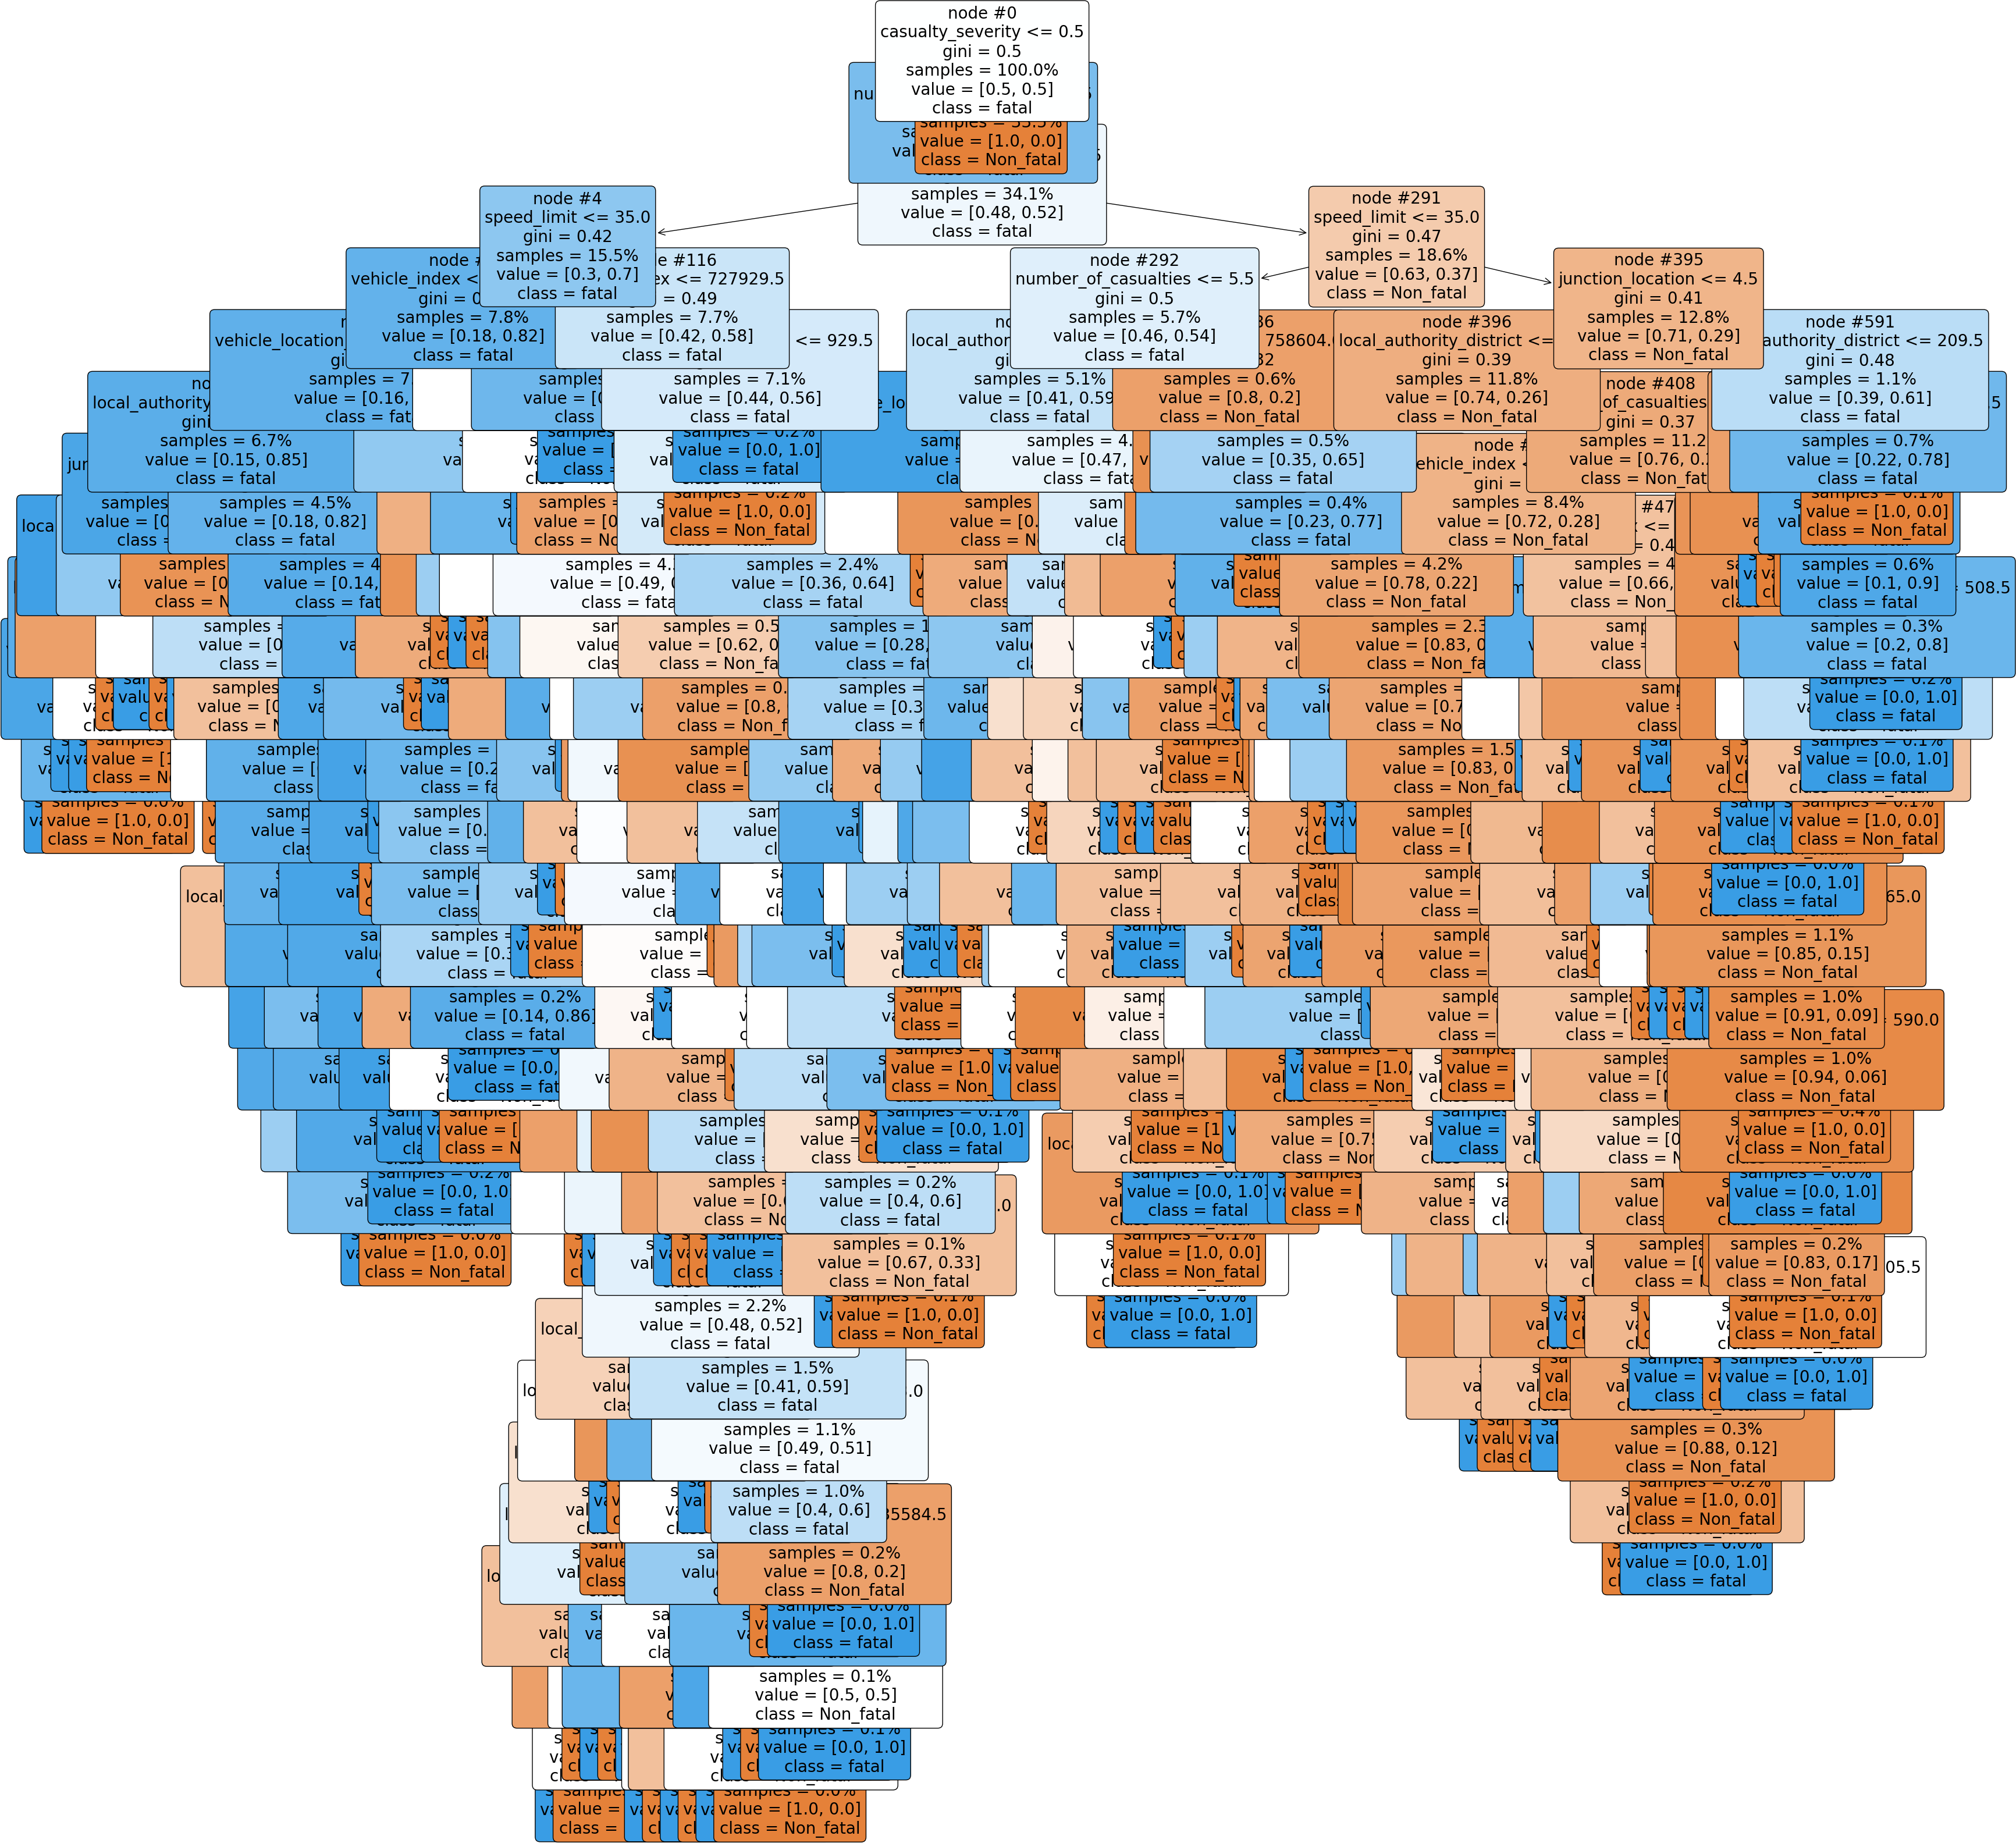

In [208]:
# Plotting the Decision Tree Model
tree_model = results_tree['estimator'][0]

plt.figure(figsize=(40, 40))  # Adjust the figure size as needed

# Plot the decision tree
plot_tree(tree_model,
          feature_names=list(results_tree['estimator'][0].feature_names_in_),
          class_names=['Non_fatal', 'fatal'],
          fontsize=20,
          filled=True,
          rounded=True,
          impurity=True,
          node_ids=True,
          proportion=True,
          precision=2)

plt.savefig('tree.png', bbox_inches='tight')  # Save the figure with tight bounding box
plt.show()  # Show the plot


In [209]:
# defining function for selected classifier
def create_model():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['random forest'] = RandomForestClassifier()
    models['naive_bayes'] = GaussianNB()
    
    return models

In [210]:
def test_custom_models():
    model = create_model()
    for model_name, model in model.items():
        print(f"Model name: {model_name}, Model instance: {model}")
        
test_custom_models()      

Model name: dtree, Model instance: DecisionTreeClassifier()
Model name: knn, Model instance: KNeighborsClassifier()
Model name: random forest, Model instance: RandomForestClassifier()
Model name: naive_bayes, Model instance: GaussianNB()


In [211]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(
            n_splits = 10,
            n_repeats = 3,
            random_state = 1
    )
    # To get scores
    scores = cross_val_score(
    model, X, y,
    scoring = 'accuracy'),
    cv = cv, error_score = 'raise'

    return scores

#### To check the performance of each of the models for the training data

In [212]:
#import warnings
warnings.filterwarnings('ignore')

#Grab the models to use.
models = create_model()
names = []
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

warnings.filterwarnings('default')

>dtree 0.903 (0.008)
>knn 0.627 (0.010)
>random forest 0.910 (0.012)
>naive_bayes 0.604 (0.013)


In [213]:
def get_stacking():
    """
    Create a stacking classifier
    """
    # Define the base classifiers
    level0 = []
    level0.append(("dtree", DecisionTreeClassifier()))
    level0.append(("knn", KNeighborsClassifier()))
    level0.append(("random forest", RandomForestClassifier()))
    level0.append(("naive_bayes", GaussianNB()))
    
    # Define the meta-classifier
    level1 = LogisticRegression() 
    
    # Create the stacking classifier using base classifiers and the meta-classifier
    model = StackingClassifier(estimators= level0, final_estimator= level1, cv = 5)
    return model

In [214]:
def create_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['random forest'] = RandomForestClassifier()
    models['naive_bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    
    return models

In [215]:
warnings.filterwarnings('ignore')

#Grab the models to use.
models = create_models()
names = []
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

warnings.filterwarnings('default')

>dtree 0.902 (0.006)
>knn 0.627 (0.010)
>random forest 0.909 (0.012)
>naive_bayes 0.604 (0.013)
>stacking 0.911 (0.010)


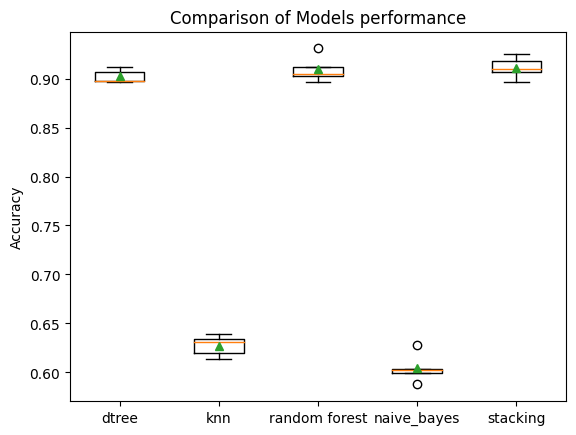

In [216]:
plt.boxplot(results, labels = names, showmeans = True)
plt.ylabel('Accuracy')
plt.title('Comparison of Models performance')
plt.show()

In [217]:
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(f"Accuracy of {name} on training data is :{score}")

Accuracy of dtree on training data is :1.0
Accuracy of knn on training data is :0.7666666666666667
Accuracy of random forest on training data is :1.0
Accuracy of naive_bayes on training data is :0.6028735632183908
Accuracy of stacking on training data is :1.0


model was trained using cross validation and balanced accuracy. As seen in the data and boxplot above, the higher the boxplot, the higher the accuracy and Decision tree classifier have best accuracy with imbalanced dataset.

### Testing the model 

In [218]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Acci_Veh_Cas_balanced_Numeric_k_best, y_balanced, test_size =0.8 , random_state = 68)

In [219]:
warnings.filterwarnings('ignore')

#Grab the models to use.
models = create_models()
names = []
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_test, y_test)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

warnings.filterwarnings('default')

>dtree 0.868 (0.028)
>knn 0.594 (0.021)
>random forest 0.875 (0.027)
>naive_bayes 0.651 (0.029)
>stacking 0.871 (0.021)


In [220]:
for name, model in models.items():
    model.fit(X_test2, y_test2)
    score = model.score(X_test2, y_test2)
    print(f"Accuracy of {name} on testing data is :{score}")

Accuracy of dtree on testing data is :1.0
Accuracy of knn on testing data is :0.7554597701149425
Accuracy of random forest on testing data is :1.0
Accuracy of naive_bayes on testing data is :0.6232758620689656
Accuracy of stacking on testing data is :1.0


In [221]:
sm = SMOTE(random_state=42)
x_res2, y_res2 = sm.fit_resample(X_test2, y_test2)

#### Stacking Classifier

In [222]:
stack = get_stacking()
stack = stack.fit(x_res2, y_res2)

y_pred = stack.predict(X_test2)
acc = accuracy_score(y_test2, y_pred)
acc

1.0

In [223]:
# Confusion Matrix
c_matrix = confusion_matrix(y_test2, y_pred)

c_report = classification_report(y_test2, y_pred)

print(c_matrix)

print(c_report)

[[1755    0]
 [   0 1725]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1755
        True       1.00      1.00      1.00      1725

    accuracy                           1.00      3480
   macro avg       1.00      1.00      1.00      3480
weighted avg       1.00      1.00      1.00      3480



Text(0.5, 23.52222222222222, 'Predicted label')

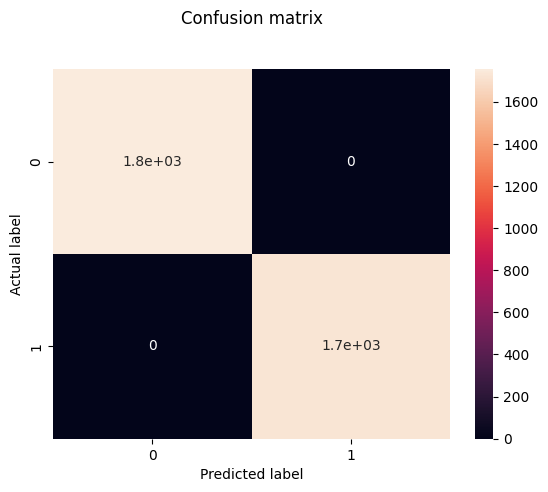

In [224]:
# visualising the confusion metrics
cm = confusion_matrix(y_test2, y_pred)

sns.heatmap(pd.DataFrame(cm), annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [236]:
!jupyter nbconvert --to pdf final big data assessment1.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'final' matched no files
[NbConvertApp] WARNING | pattern 'big' matched no files
[NbConvertApp] WARNING | pattern 'data' matched no files
[NbConvertApp] WARNING | pattern 'assessment1.ipynb' matched no files
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x2002b5992a0>
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x20011ddeb60>


The model has achieved high precision, recall, and F1-score for both classes, indicating strong performance in classifying both "False" (Non-fatal casualties) and "True" (Fatal casualties). The **accuracy of 0.96 suggests that the model is performing well overall**.

Text(0.5, 1.0, 'Permutation Importances')

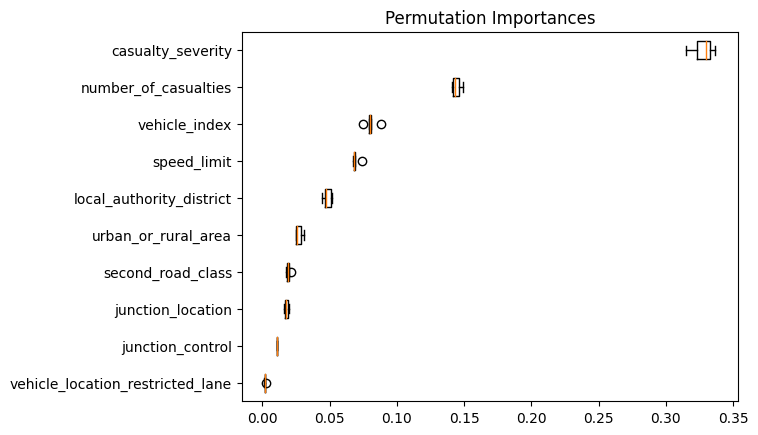

In [225]:
Result = permutation_importance(stack, x_res2, y_res2, scoring='accuracy')
sorted_idx = Result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(Result.importances[sorted_idx].T, vert=False, labels=x_res2.columns[sorted_idx])
ax.set_title("Permutation Importances")

In [239]:
!jupyter notebook -- PDF final assessment1.ipynb

[C 15:46:49.533 NotebookApp] No such file or directory: G:\PDF
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x2002b599780>


### Government Data 2020

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/995422/stats19.pdf

https://www.gov.uk/government/publications/road-accidents-and-safety-statistics-notes-and-definitions/reported-road-casualties-in-great-britain-notes-definitions-symbols-and-conventions